In [1]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
import PyNIO as Nio
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.optimize import curve_fit
import seaborn as sns
from useful_func_cy import * 

import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib import cm
from copy import deepcopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
#..deck_nas  =    ['CESM2']
exp = 'piControl'

# CMIP6: 31 (30)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
# CMIP5: 11
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}


In [4]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M]   #..current # 30+14 (44)
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M']
#.. current model #: 30 + 14 (except:'19')


path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_July9_CFMIP/'

In [4]:
## PLot 1 # read data for ordinary, 1-lrm(not best):
# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]

# deck   =  [CESM2]
output_ARRAY = {}
output_intermedia = {}
output_GMT =  {}
output_2lrm_predict  = {}
output_2lrm_report   = {}
output_2lrm_coef_LWP = {}
output_2lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
output_dict0_PI =  {}
output_dict0_abr = {}

shape_yr_modelPI =  {}
shape_yr_modelabr = {}

output_2lrm_flavra_abr =  {}
output_2lrm_flavra_PI  =  {}   # was monthly data in this case
output_2lrm_yr_bin_abr =  {}
output_2lrm_yr_bin_PI  =  {}
output_2lrm_mon_bin_abr =  {}
output_2lrm_mon_bin_PI  =  {}

output_2lrm_mon_bin_LWPpredi_PI =  {}
output_2lrm_mon_bin_LWPpredi_abr = {}

output_2lrm_dX_dTg = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}
Tr_sst =  0.0
for i in range(len(deck2)):
    print("i",i)
#     folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_' +'*' +'_dats.npz')
#     if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
#         folder_best2lrm = folder_2lrm[1]
#     else:
#         folder_best2lrm = folder_2lrm[0]
#     print(folder_best2lrm)
    
#     output_ARRAY[deck_nas2[i]] =  load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)

    output_ARRAY[deck_nas2[i]] = load(path1+deck2[i]['modn']+'_r1r1_(Jan)_(largestpiR2)_'+ '0.0K' +'_dats.npz', allow_pickle=True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_coef_albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_array_albedo_pi']
    
    # Flattened monthly data
    output_2lrm_flavra_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_PI']
    output_2lrm_flavra_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_abr']
    # monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']
    
    # Output dX changes to d(gmt) warming:
    output_2lrm_dX_dTg[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['dX_dTg']
    
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_True_PI']
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_False_PI']

    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_True_abr']
    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_False_abr']


i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19
i 20
i 21
i 22
i 23
i 24
i 25
i 26
i 27
i 28
i 29


In [7]:
##  PLot 1' # read data for best fit, 2lrm_UpDown:

# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
# deck   =  [CESM2]

output_ARRAY_updown = {}
output_intermedia_updown = {}

output_2lrmupdown_predict = {}
output_2lrmupdown_report = {}
output_2lrmupdown_coef_LWP = {}
output_2lrmupdown_coef_albedo = {}

output_dict0_PI_updown =  {}
output_dict0_abr_updown = {}

output_LRM_sstlt_up = {}
output_LRM_sstle_up = {}
output_LRM_sstlt_down = {}
output_LRM_sstle_down = {}

# BIN Datas:
output_2lrmupdown_flavra_PI =  {}
output_2lrmupdown_flavra_abr = {}

output_2lrmupdown_yr_bin_abr =  {}
output_2lrmupdown_yr_bin_PI  =  {}
output_2lrmupdown_mon_bin_abr= {}
output_2lrmupdown_mon_bin_PI = {}

output_2lrmupdown_mon_bin_LWPpredi_PI = {}
output_2lrmupdown_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Up_PI = {}
output_ind_Down_PI = {}
output_ind_Up_abr = {}
output_ind_Down_abr = {}

# Tr_sst =  0.0
# TR_sub  =  0.0

for j in range(len(deck2)):
    
    folder_2lrmud = glob.glob(path1+deck2[j]['modn']+'_r2r1_updown(Jan)_(largestpiR2)_'+'0.0K'+'_ud'+'*'+'_dats.npz')
    print(folder_2lrmud)
    
    output_ARRAY_updown[deck_nas2[j]] = load(folder_2lrmud[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia_updown[deck_nas2[j]]  = output_ARRAY_updown[deck_nas2[j]]['rawdata_dict']
    

    output_2lrmupdown_predict[deck_nas2[j]]  =   output_intermedia_updown[deck_nas2[j]][()]['predicted_metrics']
    output_2lrmupdown_report[deck_nas2[j]]  =   output_intermedia_updown[deck_nas2[j]][()]['report_metrics']
    
    output_dict0_PI_updown[deck_nas2[j]]  =   output_intermedia_updown[deck_nas2[j]][()]['dict1_PI_var']
    output_dict0_abr_updown[deck_nas2[j]]  =   output_intermedia_updown[deck_nas2[j]][()]['dict1_abr_var']
    
    output_2lrmupdown_coef_LWP[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['Coef_dict']
    output_2lrmupdown_coef_albedo[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['coef_array_albedo_pi']
    
    # Flattened monthly data
    output_2lrmupdown_flavra_PI[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['dict2_predi_fla_PI']
    output_2lrmupdown_flavra_abr[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['dict2_predi_fla_abr']
    
    # monthly data
    output_2lrmupdown_mon_bin_PI[deck_nas2[j]] = output_dict0_PI_updown[deck_nas2[j]]['dict1_mon_bin_PI']
    output_2lrmupdown_mon_bin_abr[deck_nas2[j]] = output_dict0_abr_updown[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrmupdown_yr_bin_PI[deck_nas2[j]] = output_dict0_PI_updown[deck_nas2[j]]['dict1_yr_bin_PI']
    output_2lrmupdown_yr_bin_abr[deck_nas2[j]] = output_dict0_abr_updown[deck_nas2[j]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_2lrmupdown_mon_bin_LWPpredi_PI[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['LWP_predi_bin_PI']
    output_2lrmupdown_mon_bin_LWPpredi_abr[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['LWP_predi_bin_abr']
    
    # Ind_Up & Down 
    output_ind_Up_PI[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['ind_Up_PI']
    output_ind_Down_PI[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['ind_Down_PI']

    output_ind_Up_abr[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['ind_Up_abr']
    output_ind_Down_abr[deck_nas2[j]] = output_intermedia_updown[deck_nas2[j]][()]['ind_Down_abr']


['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/AWI-CM-1-1-MR_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud-1.02_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/BCC-ESM1_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud-0.25_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CanESM5_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud-1.33_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud1.41_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-FV2_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud1.58_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-WACCM_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud1.77_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-WACCM-FV2_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud1.92_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CMCC-CM2-SR5_r2r1_updown(Jan)_(largestpiR2)_0.0K_ud-0.52_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_l

In [5]:
## PLot 1' # read data for best fit, 4-lrm:

# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]

output_ARRAY_best4 = {}   # storage output file
output_intermedia_best4 = {}   # storage the 'rawdata_dict'

output_dict0_PI_best4 = {}
output_dict0_abr_best4 = {}

output_GMT =  {}
output_4lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_4lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_4lrm_coef_LWP = {}
output_4lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_4lrm_coef_albedo_lL = {}


# Report data: dictionaries
output_4lrm_yr_bin_abr =  {}
output_4lrm_yr_bin_PI  =  {}
output_4lrm_mon_bin_abr =  {}
output_4lrm_mon_bin_PI  =  {}   # above are 3d-strcture array
output_4lrm_flavra_abr =  {}
output_4lrm_flavra_PI  =  {}   # were monthly data in 1-d

# Predicted data: currently 'albedo_lL'
output_4lrm_mon_bin_predi_PI =  {}   # were monthly data in 1-d
output_4lrm_mon_bin_predi_abr = {}

# Statistic metrics for prediction: currently 'albedo_lL'
output_4lrm_stats_PI_rsut_lL = {}
output_4lrm_stats_abr_rsut_lL = {}
output_4lrm_stats_PI_albedo_lL = {}
output_4lrm_stats_abr_albedo_lL = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_Up_PI = {}
output_ind_Hot_Up_PI = {}
output_ind_Cold_Down_PI = {}
output_ind_Hot_Down_PI = {}

output_ind_Cold_Up_abr = {}
output_ind_Hot_Up_abr = {}
output_ind_Cold_Down_abr = {}
output_ind_Hot_Down_abr = {}

TR_sst =  271.79
TR_sub =  1.0

for j in range(len(deck2)):
    # Best fit_files:
    
    folder_4lrm = glob.glob(path1 +deck2[j]['modn'] +'_r4r1(Jan)_(largestpiR2)_July14th' + '*K'+'_ud'+ '*' +'_dats.npz')
    print(folder_4lrm)
    output_ARRAY_best4[deck_nas2[j]] = load(str(folder_4lrm[0]), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    
    # folder_4lrm =  glob.glob(path1 +deck2[j]['modn'] +'_swrpredi(largestpiR2)_' + '*K'+'_ud'+ '*' +'_dats.npz')
    # print(folder_4lrm)
    # output_ARRAY_best4[deck_nas2[j]] =  load(str(folder_4lrm), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    # defined Thresholds files:
    # output_ARRAY_best4[deck_nas2[j]] =  load(path1+deck2[j]['modn']+'_swrpredi_'+ str(TR_sst)+'K'+'_ud'+ str(TR_sub)+ '_dats.npz', allow_pickle=True)  
    
    output_intermedia_best4[deck_nas2[j]] = output_ARRAY_best4[deck_nas2[j]]['rawdata_dict']
    
    output_dict0_PI_best4[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict1_PI_var']
    output_dict0_abr_best4[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict1_abr_var']
    
    output_GMT[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['GMT']
    output_4lrm_predicted[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['predicted_metrics']
    output_4lrm_report[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['report_metrics']
    output_4lrm_coef_LWP[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['Coef_dict']
    output_4lrm_coef_albedo[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['coef_array_albedo_pi']

    
    # Monthly data dict
    output_4lrm_mon_bin_PI[deck_nas2[j]] = output_dict0_PI_best4[deck_nas2[j]]['dict1_mon_bin_PI']
    output_4lrm_mon_bin_abr[deck_nas2[j]] = output_dict0_abr_best4[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data dict
    output_4lrm_yr_bin_PI[deck_nas2[j]] = output_dict0_PI_best4[deck_nas2[j]]['dict1_yr_bin_PI']
    output_4lrm_yr_bin_abr[deck_nas2[j]] = output_dict0_abr_best4[deck_nas2[j]]['dict1_yr_bin_abr']
    # Flattened Report monthly data dict
    output_4lrm_flavra_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_PI']
    output_4lrm_flavra_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_abr']

    # Flattened Predicted monthly data
    output_4lrm_mon_bin_predi_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_PI']
    output_4lrm_mon_bin_predi_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_abr']

    
    # Statistic metrics measures the predictions
    # output_4lrm_stats_PI_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_rsut_lL']
    # output_4lrm_stats_abr_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_rsut_lL']
    # output_4lrm_stats_PI_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_albedo_lL']
    # output_4lrm_stats_abr_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_albedo_lL']

    # INDEX of regime(s): determine regime-dependent model mean_state LWP
    output_ind_Cold_Up_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Up_PI']
    output_ind_Hot_Up_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Up_PI']
    output_ind_Cold_Down_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Down_PI']
    output_ind_Hot_Down_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Down_PI']
    output_ind_Cold_Up_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Up_abr']
    output_ind_Hot_Up_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Up_abr']
    output_ind_Cold_Down_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Down_abr']
    output_ind_Hot_Down_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Down_abr']

print('Done read 4-LRM file(s)')


['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r4r1(Jan)_(largestpiR2)_July14th_268.19K_ud-0.25_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r4r1(Jan)_(largestpiR2)_July14th_268.9K_ud-0.57_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r4r1(Jan)_(largestpiR2)_July14th_269.19K_ud1.41_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r4r1(Jan)_(largestpiR2)_July14th_269.73K_ud1.58_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r4r1(Jan)_(largestpiR2)_July14th_269.27K_ud1.77_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r4r1(Jan)_(largestpiR2)_July14th_269.99K_ud0.61_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r4r1(Jan)_(largestpiR2)_July14th_266.62K_ud-0.58_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-H_r4r1(Jan)_(largestpiR2)_July14th_270.37K_ud0.66_dats.npz']
['/glade/scratch/chuyan/CMIP_

In [6]:
## PLot 3: coefficient plot for 0k(1-LRM) OR 2-lrm

# calc data (monthly) standard deviation:

sigma1 = full((len(deck2), 4), 0.0)
sigma2 = full((len(deck2), 4), 0.0)

coef1 =  []
coef2 =  []
stcoef1 = full((len(deck2), 4), 0)
stcoef2 = full((len(deck2), 4), 0)
itcp1 =  []
itcp2 =  []

dX_dTg1  = full((len(deck2), 4), 0.000)
dX_dTg2  = full((len(deck2), 4), 0.000)

dX_dTg_modelresponse = full(len(deck2), 0.000)
f5yr_index = [0*12*730, 5*12*730]
l5yr_index = [145*12*730+1, 150*12*730]

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_' +'*' +'_dats.npz')
    if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
        folder_best2lrm = folder_2lrm[1]
    else:
        folder_best2lrm = folder_2lrm[0]
    print(folder_best2lrm)
    
    index_st_sst = str(folder_best2lrm).index('fit') +4
    index_ed_sst = str(folder_best2lrm).index('_dats')
    print(list(folder_best2lrm)[index_st_sst], list(folder_best2lrm)[index_ed_sst])
    
    TR_sst = float(str(folder_best2lrm)[index_st_sst:index_ed_sst])
    print('TR_sst =', TR_sst)
    # TR_sub = 0.0
    '''
    
    # start calculating SD of CCFs on monthly scale:

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for1-lrm
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] <  TR_sst)
    

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7.shape)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8.shape)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7])])

    sigma2[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8])])
    
    
    # Calc the Change of Standard deviation of CCFs in each regime with/ to the per degree change of air temperature changes
    # print(sigma1[i,:].shape)
    
    
    delta_LWP_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][f5yr_index[0]:f5yr_index[1]])
    
    delta_SST_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][f5yr_index[0]:f5yr_index[1]])
    delta_p_e_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][f5yr_index[0]:f5yr_index[1]])
    delta_LTS_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][f5yr_index[0]:f5yr_index[1]])
    delta_SUB_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][f5yr_index[0]:f5yr_index[1]])
    
    delta_gmt_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][l5yr_index[0]:l5yr_index[1]:730]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][f5yr_index[0]:f5yr_index[1]:730])
    # print(delta_SST_l5_f5, delta_gmt_l5_f5)
    
    dX_dTg1[i,:]   =  array([delta_SST_l5_f5/delta_gmt_l5_f5, delta_p_e_l5_f5/delta_gmt_l5_f5, 
                            delta_LTS_l5_f5/delta_gmt_l5_f5, delta_SUB_l5_f5/delta_gmt_l5_f5]).flatten() /sigma1[i,:]
    
    # dX_dTg2[i,:]  =  
    
    
    # Calc the True model response of CLOUD LWP changes with/ to change of air temperature changes
    dX_dTg_modelresponse[i]  = 1000.*  delta_LWP_l5_f5 / delta_gmt_l5_f5


# print(dX_dTg1.shape, dX_dTg1)

## switch 'nan' points to 0
ind_sg1 = isnan(sigma2)== True
ind_sgtrue = nonzero(ind_sg1==True)
sigma2[ind_sgtrue] = 0.0
# print(sigma1, sigma2)


# Retrieved the 1/2-lrm coefficients:

for j in range(len(deck2)):
    a_le  = output_LRM_le[deck_nas2[j]][0].copy()
    a_lt  = output_LRM_lt[deck_nas2[j]][0].copy()
    
    a0_le = output_LRM_le[deck_nas2[j]][1]
    a0_lt = output_LRM_lt[deck_nas2[j]][1]
    
    coef1.append(array(a_le))
    coef2.append(array(a_lt))
    itcp1.append(array(a0_le))
    itcp2.append(array(a0_lt))

# print(array(coef2).shape, array(coef1), array(itcp1))

# product of monthly variations and coefficients
stcoef1 = ( 1000. * array(coef1))#   * sigma1[i,:] 
stcoef2 = ( 1000. * array(coef2))#   * sigma2[i,:]
print(stcoef1,' ', itcp1)



# #Test d(SST)_d(gmt)
# regr2 = linear_model.LinearRegression()
# # re_SST = regr2.fit(output_2lrm_flavra_abr[deck_nas2[0]]['gmt'].reshape(-1,1), output_2lrm_flavra_abr[deck_nas2[0]]['SST'])
# re_SST = regr2.fit(gmt_per10yr.reshape(-1,1), sst_per10yr)
# print(re_SST.intercept_, re_SST.coef_)


# Calc the CCF- Driven Change in Low Cloud LWP:
##.. Per Cloud Properties(lwp) changes to per degree change of air temperature changes for each Cloud Controling Factors: 
dC_dg_Cs =  stcoef1 * dX_dTg1

dC_dg_Cs_sum  = sum(dC_dg_Cs, axis = 1)

# print(dC_dg_Cs, dC_dg_Cs_sum)


CC_ccfdriven = append(dC_dg_Cs_sum.reshape(-1,1), dC_dg_Cs, axis =1)
# print(CC_ccfdriven)
# print(dX_dTg_modelresponse)

CC_ccfdriven_withtruemodel  = append(dX_dTg_modelresponse.reshape(-1, 1), CC_ccfdriven, axis=1)
# print(CC_ccfdriven_withtruemodel[:,:2], sum((CC_ccfdriven_withtruemodel[:,0] - nanmean(CC_ccfdriven_withtruemodel[:,0]))**2) /18.)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


[[ 2.37869544e+00  4.55390993e+01 -1.16072581e+00  8.12036901e+01]
 [ 1.58170067e+00  1.56069538e+01 -6.09283028e-01  3.32025522e+02]
 [ 2.47831802e+00  1.10754505e+01 -3.64025957e-01  1.82281643e+02]
 [ 2.17016405e+00  9.26951549e+00  6.79100862e-03  2.52433709e+02]
 [ 2.47129850e+00  1.10215750e+01 -3.41560476e-01  1.89853173e+02]
 [ 1.11396849e+00  1.22503763e+01  1.78066239e-01  1.96797846e+02]
 [ 2.06429065e+00  3.30420044e+01  5.32799196e-01 -4.99667571e+01]
 [ 2.09684390e+00  3.18582868e+01  9.25242821e-01 -8.41494952e+01]
 [ 2.27198240e+00  1.84610488e+01 -9.62166505e-01  2.05959206e+02]
 [ 2.31556117e+00  2.69833941e+01  1.13371918e-01  1.57887695e+02]
 [ 3.88325351e+00  4.25354358e+01  3.32612906e-01  4.60245841e+02]
 [ 1.07629404e+00  6.16173315e+00  5.86881373e-01  2.98022877e+02]
 [ 1.34420072e+00  1.20536151e+01  1.52319105e-02  5.11894149e+01]
 [ 2.18991795e+00  1.07119511e+01  3.06750193e-01  3.59495827e+01]
 [ 1.54855165e+00  1.34949077e+01  3.13790456e-02  2.57031690e

In [7]:
# old method: before Marth 8th
## for 2-lrm
abr_str_mon = 140*12
abr_end_mon = 150*12

# sen_ccfS_2lrm = full((len(deck_nas2), 10, 4), 0.00)
dX_dTg1  = full((len(deck_nas2), 10, 4), 0.000)

delta_SST = np.full((len(deck_nas2), 10), 0.000)
delta_p_e = np.full((len(deck_nas2), 10), 0.000)
delta_LTS = np.full((len(deck_nas2), 10), 0.000)
delta_SUB = np.full((len(deck_nas2), 10), 0.000)
# print(delta_SST_l5_f5, delta_gmt_l5_f5)
    
# dX_dTg1[i,:]   =  array([delta_SST_l5_f5/delta_gmt_l5_f5, delta_p_e_l5_f5/delta_gmt_l5_f5, 
#                         delta_LTS_l5_f5/delta_gmt_l5_f5, delta_SUB_l5_f5/delta_gmt_l5_f5]).flatten() /sigma1[i,:]

dabrmeanpi_report = full((len(deck_nas2), 10), 0.00)
dabrmeanpi_regrss = full((len(deck_nas2), 10), 0.00)
# output_dabrmeanpi_report[deck_nas2[a]] = output_2lrm_report[deck_nas2[a]][0:] - nanmean(output_2lrm_report[deck_nas2[a]][0:shape_yr_modelPI[deck_nas2[a]]])

for i in arange(len(deck2)):
    
    for j in arange(0, 10, 1):
        # print(nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)))
        dabrmeanpi_report[i, j]  = 1000.*(nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:], axis=(0,1)))
        
        # X  = np.array([output_2lrm_mon_bin_PI[deck_nas2[i]]['LTS_mon_bin'][:,j,:].flatten(), output_2lrm_mon_bin_PI[deck_nas2[i]]['SUB_mon_bin'][:,j,:].flatten()])

        # regr1 = linear_model.LinearRegression()
        # result1 = regr1.fit(X.T, output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:].flatten())   #..regression for LWP WITH LTS and skin-T >= TR_sst
        
        # stcoef1 in shape:(18,4)
        delta_SST[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['SST_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'][:,j,:], axis=(0,1)))# / sigma1[i,0]
        delta_p_e[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['p_e_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['p_e_mon_bin'][:,j,:], axis=(0,1)))# / sigma1[i,1]
        delta_LTS[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LTS_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LTS_mon_bin'][:,j,:], axis=(0,1)))# / sigma1[i,2]
        delta_SUB[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['SUB_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['SUB_mon_bin'][:,j,:], axis=(0,1)))# / sigma1[i,3]
        
    dX_dTg1[i,:,0] = delta_SST[i,:]
    dX_dTg1[i,:,1] = delta_p_e[i,:]
    dX_dTg1[i,:,2] = delta_LTS[i,:]
    dX_dTg1[i,:,3] = delta_SUB[i,:]
    
    dabrmeanpi_regrss[i,:] = (np.dot(dX_dTg1[i,:,:], stcoef1[i,:].reshape(-1, 1))).flatten()
    

#print(dabrmeanpi_report)
#print(dabrmeanpi_regrss) 

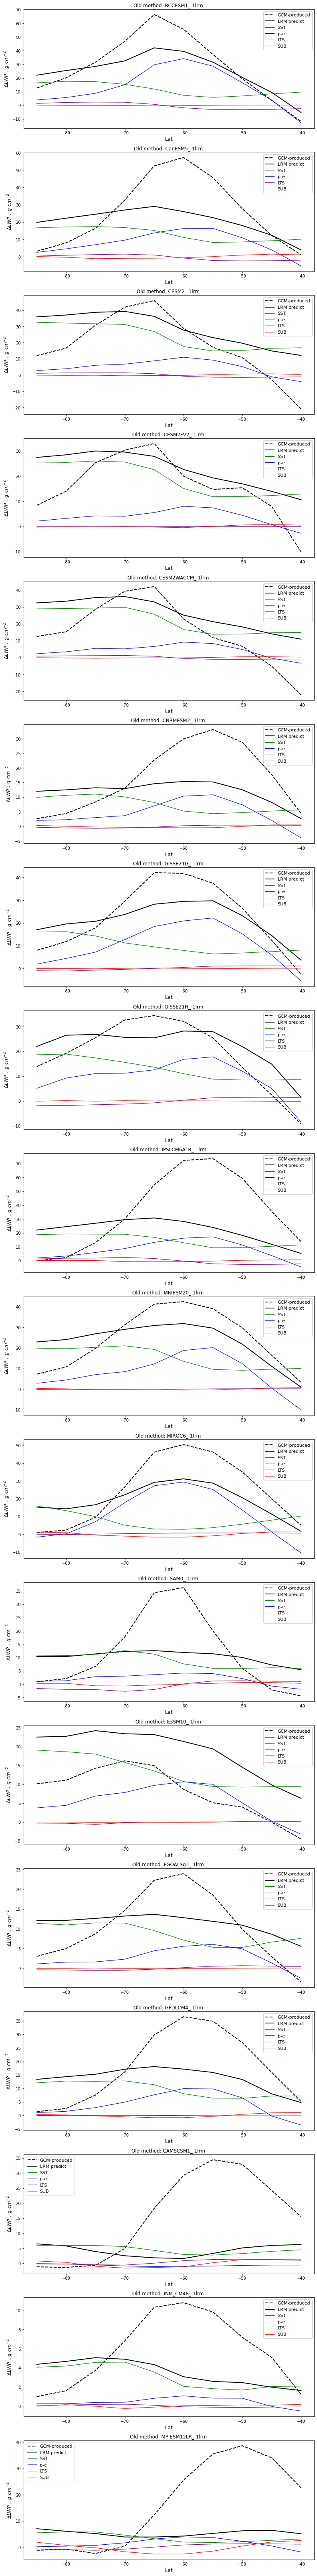

In [8]:
parameters = {'axes.labelsize': 12, 'legend.fontsize': 11, 
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}
plt.rcParams.update(parameters)

fig81, ax81 = plt.subplots(18, 1, figsize=(13., 6.5*18.))
lat = np.arange(-85., -35., 5.)
for a in range(len(deck2)):
    
    ax81[a].plot(lat, dabrmeanpi_report[a,:], '--', c ='k', linewidth=2, label='GCM-produced')
    ax81[a].plot(lat, dabrmeanpi_regrss[a,:], '-', c= 'k', linewidth=2, label='LRM predict')
    
    ax81[a].plot(lat, dX_dTg1[a,:,0]*stcoef1[a,0], '-', c= 'green', linewidth=1.2, label='SST')
    ax81[a].plot(lat, dX_dTg1[a,:,1]*stcoef1[a,1], '-', c= 'blue', linewidth=1.2, label='p-e')
    ax81[a].plot(lat, dX_dTg1[a,:,2]*stcoef1[a,2], '-', c= 'purple', linewidth=1.2, label='LTS')
    ax81[a].plot(lat, dX_dTg1[a,:,3]*stcoef1[a,3], '-', c= 'red', linewidth=1.2, label='SUB')
    
    ax81[a].set_xlabel(' Lat ')
    ax81[a].set_ylabel(r"$ \Delta LWP \ $" + r"$,\ g\ cm^{-2}$")
    ax81[a].set_title("Old method: "+deck_nas2[a]+"_ 1lrm ")
    
    ax81[a].legend()
    
# plt.show()
plt.savefig("Latitude_structure(deltaLWP)_1lrm_Oldmethod", dpi= 300)

In [10]:
# method: after Marth 8th(Marth .15th)
## for 2-lrm:
abr_str_mon = 140*12
abr_end_mon = 150*12

dabrmeanpi_report_2lrm = full((len(deck2), 10), 0.000)
dabrmeanpi_regrss_2lrm = full((len(deck2), 10), 0.000)

for i in arange(len(deck_nas2)):
    
    for j in range(0, 10, 1):
        dabrmeanpi_report_2lrm[i,j] =  1000.*( nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:]) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:]))
        dabrmeanpi_regrss_2lrm[i,j] =  1000.*( nanmean(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]][abr_str_mon:abr_end_mon,j,:]) - nanmean(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]][:, j,:]) )
        
# print(dabrmeanpi_regrss)
dabrmeanpi_individual_ccfsdriven = full((len(deck2), 10, 4), 0.00)

In [11]:
# new method for 1/2-lrm, after Marth 8th
# mask all other regression factors(CCfs), only use One coefficient (ignore intercept):

CCF_driven_LWP_PI_2lrm = {}
CCF_driven_LWP_abr_2lrm = {}


for i in arange(len(deck2)):
    # PI
    ind1 = isnan(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    # TR_sub = 0.0
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for1-lrm

    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] <  TR_sst)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7.shape)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8.shape)   #.. points, shape8
    
    # create an "eg " array tp store the value of LWP (first store the missing value)
    shape_mon_PI = output_2lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_PI = output_2lrm_flavra_PI[deck_nas2[i]]['LWP'].shape
    
    eg = full((shape_fla_PI), 0.0)
    eg[ind_false]  =  output_2lrm_flavra_PI[deck_nas2[i]]['LWP'][ind_false]
    # ccf driven LWP for PI
    egccf1 = eg.copy()
    egccf2 = eg.copy()
    egccf3 = eg.copy()
    egccf4 = eg.copy()
    
    X1  = array([output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind7], output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7], 
                    output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7], output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7]])
    
    X2  = array([output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind8], output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8], 
                    output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8], output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8]])
    # print(X1.shape)
    
    eg7_sstdri = 1000.* array(coef1)[i,0] * X1[0,:]
    eg7_p_edri = 1000.* array(coef1)[i,1] * X1[1,:]
    eg7_ltsdri = 1000.* array(coef1)[i,2] * X1[2,:]
    eg7_subdri = 1000.* array(coef1)[i,3] * X1[3,:]
    # print(eg1_sstdri.shape)
    
    # no ind8 (sst < TR_SST data) 
    eg8_sstdri = 1000.* array(coef2)[i,0] * X2[0,:]
    eg8_p_edri = 1000.* array(coef2)[i,1] * X2[1,:]
    eg8_ltsdri = 1000.* array(coef2)[i,2] * X2[2,:]
    eg8_subdri = 1000.* array(coef2)[i,3] * X2[3,:]
    
    
    # PUT the regressed values of individual regressed factors:
    egccf1[ind7] =  eg7_sstdri
    egccf1[ind8] =  eg8_sstdri
    
    egccf2[ind7] =  eg7_p_edri
    egccf2[ind8] =  eg8_p_edri
    
    egccf3[ind7] =  eg7_ltsdri
    egccf3[ind8] =  eg8_ltsdri
    
    egccf4[ind7] =  eg7_subdri
    egccf4[ind8] =  eg8_subdri
    
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'SST']  =  egccf1.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'p_e']  =  egccf2.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'LTS']  =  egccf3.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'SUB']  =  egccf4.reshape(shape_mon_PI)


for j in arange(len(deck2)):
    # abr
    ind1_abr = isnan(output_2lrm_flavra_abr[deck_nas2[j]]['LTS'])==False

    ind_true_abr = nonzero(ind1_abr==True)
    ind_false_abr = nonzero(ind1_abr==False)
    # TR_sub = 0.0
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    

    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le_abr  = nonzero(output_2lrm_flavra_abr[deck_nas2[j]]['SST'] >= TR_sst)
    ind_sst_st_abr  = nonzero(output_2lrm_flavra_abr[deck_nas2[j]]['SST'] <  TR_sst)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_abr = intersect1d(ind_true_abr, ind_sst_le_abr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_abr = intersect1d(ind_true_abr, ind_sst_st_abr)
    # print(ind7_abr.shape, ind8_abr.shape )
    
    # create an "eg " arrayy tp store all the missing value of LWP
    shape_mon_abr = output_2lrm_mon_bin_abr[deck_nas2[j]]['SST_mon_bin'].shape
    shape_fla_abr = output_2lrm_flavra_abr[deck_nas2[j]]['LWP'].shape
    
    eg_abr = full((shape_fla_abr), 0.0)
    eg_abr[ind_false_abr]  =  output_2lrm_flavra_abr[deck_nas2[j]]['LWP'][ind_false_abr]
    # print(nanmean(eg_abr[ind_false_abr]), nanmean(output_2lrm_flavra_abr[deck_nas2[j]]['LWP'][ind_false_abr]))
    
    egccf1_abr = eg_abr.copy()
    egccf2_abr = eg_abr.copy()
    egccf3_abr = eg_abr.copy()
    egccf4_abr = eg_abr.copy()
    
    X1_abr  = array([output_2lrm_flavra_abr[deck_nas2[j]]['SST'][ind7_abr], output_2lrm_flavra_abr[deck_nas2[j]]['p_e'][ind7_abr], 
                    output_2lrm_flavra_abr[deck_nas2[j]]['LTS'][ind7_abr], output_2lrm_flavra_abr[deck_nas2[j]]['SUB'][ind7_abr]])
    
    X2_abr  = array([output_2lrm_flavra_abr[deck_nas2[j]]['SST'][ind8_abr], output_2lrm_flavra_abr[deck_nas2[j]]['p_e'][ind8_abr], 
                    output_2lrm_flavra_abr[deck_nas2[j]]['LTS'][ind8_abr], output_2lrm_flavra_abr[deck_nas2[j]]['SUB'][ind8_abr]])
    # print(X1_abr.shape)
    
    eg7_sstdri_abr = 1000.* array(coef1)[j,0] * X1_abr[0,:]
    eg7_p_edri_abr = 1000.* array(coef1)[j,1] * X1_abr[1,:]
    eg7_ltsdri_abr = 1000.* array(coef1)[j,2] * X1_abr[2,:]
    eg7_subdri_abr = 1000.* array(coef1)[j,3] * X1_abr[3,:]
    # print(eg7_sstdri_abr.shape)
    
    # no ind8 (sst < TR_SST data) 
    eg8_sstdri_abr = 1000.* array(coef2)[j,0] * X2_abr[0,:]
    eg8_p_edri_abr = 1000.* array(coef2)[j,1] * X2_abr[1,:]
    eg8_ltsdri_abr = 1000.* array(coef2)[j,2] * X2_abr[2,:]
    eg8_subdri_abr = 1000.* array(coef2)[j,3] * X2_abr[3,:]
    
    # PUT the regressed values of individual regrss factors:
    
    egccf1_abr[ind7_abr] =  eg7_sstdri_abr
    egccf1_abr[ind8_abr] =  eg8_sstdri_abr
    
    egccf2_abr[ind7_abr] =  eg7_p_edri_abr
    egccf2_abr[ind8_abr] =  eg8_p_edri_abr
    
    egccf3_abr[ind7_abr] =  eg7_ltsdri_abr
    egccf3_abr[ind8_abr] =  eg8_ltsdri_abr
    
    egccf4_abr[ind7_abr] =  eg7_subdri_abr
    egccf4_abr[ind8_abr] =  eg8_subdri_abr
    
    # print(egccf1_abr)
    
    # cloud controlling factor explained LWP changes 
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'SST']  =  egccf1_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'p_e']  =  egccf2_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'LTS']  =  egccf3_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'SUB']  =  egccf4_abr.reshape(shape_mon_abr)

In [12]:
# dabrmeanpi_individual_ccfsdriven = full((len(deck2), 10, 4), 0.00)

for i in arange(len(deck2)):
    
    for j in range( 0, 10, 1):
        
        dabrmeanpi_individual_ccfsdriven[i,j,0]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'SST'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'SST'][:, j, :])
        dabrmeanpi_individual_ccfsdriven[i,j,1]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'p_e'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'p_e'][:, j, :])
        dabrmeanpi_individual_ccfsdriven[i,j,2]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'LTS'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'LTS'][:, j, :])
        dabrmeanpi_individual_ccfsdriven[i,j,3]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'SUB'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'SUB'][:, j, :])

        

In [13]:
print("LRM predict: ", dabrmeanpi_regrss_2lrm[1,:])

print("Sum of individual CCF: ", sum(dabrmeanpi_individual_ccfsdriven[1,:,:], axis= 1))

LRM predict:  [19.82621817 22.25591083 24.55910133 26.98364101 29.06046485 26.05348011
 22.56700975 18.00104011 12.43365384  3.89530427]
Sum of individual CCF:  [19.82621817 22.25591083 24.55910133 26.98364101 29.06046485 26.05348011
 22.56700975 18.00104011 12.43365384  3.89530427]


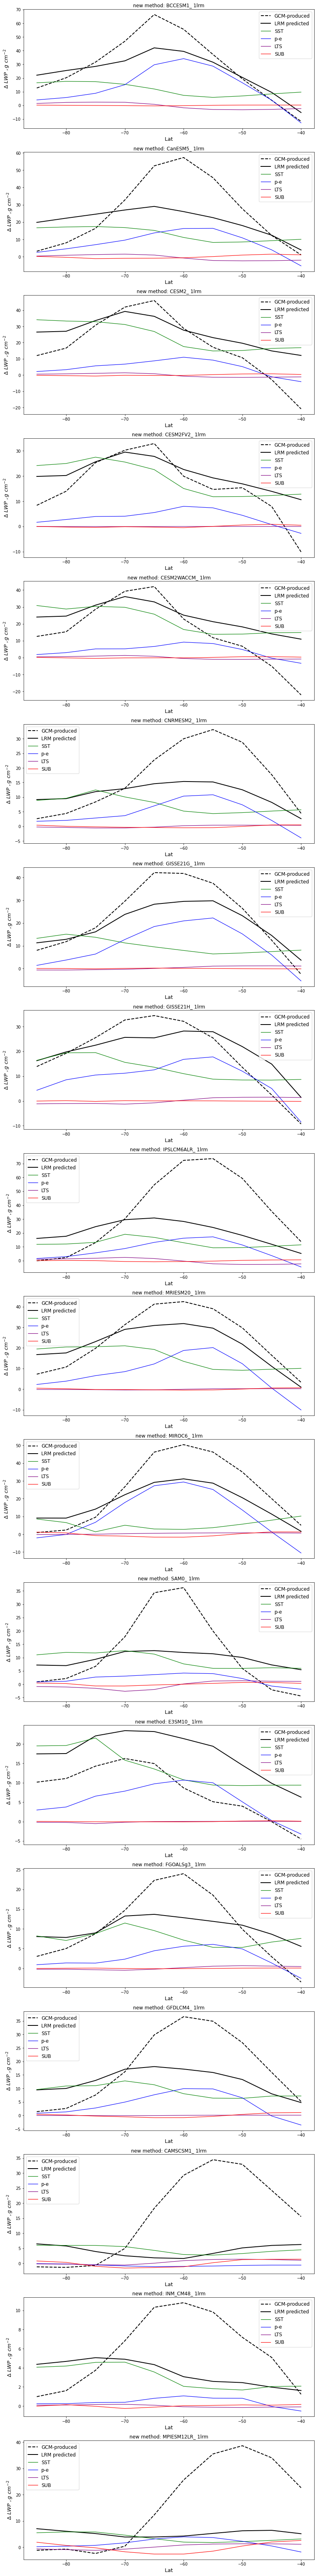

In [14]:
parameters = {'axes.labelsize': 13, 'legend.fontsize': 12, 
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}

plt.rcParams.update(parameters)


fig82, ax82 =  plt.subplots(18, 1, figsize=(13, 6.5*18.))
lat = np.arange(-85., -35., 5.)

for a in range(len(deck2)):    
    
    ax82[a].plot(lat, dabrmeanpi_report_2lrm[a,:], '--', c ='k', linewidth=2, label='GCM-produced')
    ax82[a].plot(lat, dabrmeanpi_regrss_2lrm[a,:], '-', c= 'k', linewidth=2, label='LRM predicted')
    
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,0], '-', c= 'green', linewidth=1.2, label='SST')
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,1], '-', c= 'blue',  linewidth=1.2, label='p-e')
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,2], '-', c= 'purple', linewidth=1.2, label='LTS')
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,3], '-', c= 'red',  linewidth=1.2, label='SUB')
    
    ax82[a].set_xlabel(' Lat ') 
    ax82[a].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ cm^{-2}$")
    ax82[a].set_title("new method: " + deck_nas2[a] +"_ 1lrm")
    
    ax82[a].legend()
    
plt.show()

# plt.savefig("Latitude_structure(deltaLWP)_1lrm_Newmethod", dpi= 300)

In [6]:
# prep step1: coef_array

# calc data (monthly) standard deviation:
coef3 =  []
coef4 =  []
coef5 =  []
coef6 =  []

stcoef3  = full((len(deck2), 4), 0)
stcoef4  = full((len(deck2), 4), 0)
stcoef5  = full((len(deck2), 4), 0)
stcoef6  = full((len(deck2), 4), 0)

itcp3 =  []
itcp4 =  []
itcp5 =  []
itcp6 =  []

coef_array_18 = []

# dX_dTg1  = full((len(deck2), 4), 0.000)
# dX_dTg2  = full((len(deck2), 4), 0.000)
# dX_dTg3  = full((len(deck2), 4), 0.000)
# dX_dTg4  = full((len(deck2), 4), 0.000)


# # true LWP response to warming, this array storaged the four regimes response:
# dX_dTg_modelresponse1 = full(len(deck2), 0.000)
# dX_dTg_modelresponse2 = full(len(deck2), 0.000)
# dX_dTg_modelresponse3 = full(len(deck2), 0.000)
# dX_dTg_modelresponse4 = full(len(deck2), 0.000)

# Retrieved the 4-lrm coefficients:
for j in range(len(deck2)):
    a_lt_up = output_4lrm_coef_LWP[deck_nas2[j]][0][0].copy()
    a_le_up = output_4lrm_coef_LWP[deck_nas2[j]][1][0].copy()
    a_lt_dn = output_4lrm_coef_LWP[deck_nas2[j]][2][0].copy()
    a_le_dn = output_4lrm_coef_LWP[deck_nas2[j]][3][0].copy()
    
    a0_lt_up = output_4lrm_coef_LWP[deck_nas2[j]][0][1]
    a0_le_up = output_4lrm_coef_LWP[deck_nas2[j]][1][1]
    a0_lt_dn = output_4lrm_coef_LWP[deck_nas2[j]][2][1]
    a0_le_dn = output_4lrm_coef_LWP[deck_nas2[j]][3][1]
    
    coef_array_18.append([[a_lt_up, a0_lt_up], [a_le_up, a0_le_up], [a_lt_dn, a0_lt_dn], [a_le_dn, a0_le_dn]]) 
    # print(coef_array_18)
    
    # print(m, t, e, f)
    coef3.append(a_lt_up)
    coef4.append(a_le_up)
    coef5.append(a_lt_dn)
    coef6.append(a_le_dn)
    
    itcp3.append(array(a0_lt_up))
    itcp4.append(array(a0_le_up))
    itcp5.append(array(a0_lt_dn))
    itcp6.append(array(a0_le_dn))

coef_array_18 = array(coef_array_18)
print(array(coef3))

print(itcp3,' ', itcp4,' ', itcp5,' ', itcp6 )


print(coef_array_18[17, 0, 0][0])

[[ 2.26038790e-03  5.14764901e-02 -6.22735969e-04  3.65038048e-01]
 [ 1.23926822e-03  2.44265862e-02  2.64015538e-04  1.92710408e-02]
 [ 2.02400854e-03  1.16225598e-02 -3.43304230e-04  7.17842338e-02]
 [ 1.92350635e-03  4.91332732e-03 -8.81303730e-05  1.09323651e-01]
 [ 1.99560169e-03  1.09924334e-02 -3.30088712e-04  6.50021240e-02]
 [ 4.70095572e-04  7.70895283e-03  1.66414355e-05  5.82607231e-02]
 [ 2.23356256e-03  7.03545080e-02  4.95503739e-04 -5.05112754e-02]
 [ 2.07687400e-03  7.10766026e-02 -2.43490324e-04 -9.26018209e-02]
 [ 7.61626800e-04  1.58522692e-02  2.63683504e-04 -2.86700485e-03]
 [ 5.63045769e-04  2.34337131e-02  2.87947360e-04  8.81161535e-02]
 [ 2.97033197e-03  5.07429641e-02  4.49113769e-04  9.21738950e-04]
 [ 4.04358245e-04  1.62678187e-03 -3.47310351e-05  5.11405502e-02]
 [ 1.43717444e-03  1.37712055e-02  7.11443203e-06  8.48995765e-02]
 [ 1.36842151e-03  3.59446531e-03  4.26953695e-05  3.97466965e-03]
 [ 2.77273192e-04  7.88027318e-03  4.61887242e-06  4.93779041e

In [7]:
# method: after Marth 8th(Marth .15th)
## for 4-lrm:

abr_str_mon = 140*12
abr_end_mon = 150*12 

dabrmeanpi_report_4lrm = full((len(deck2), 10), 0.000)
dabrmeanpi_regrss_4lrm = full((len(deck2), 10), 0.000)

for i in arange(len(deck_nas2)):
    for j in range(0, 10, 1):
        
        dabrmeanpi_report_4lrm[i,j] = 1000.*(nanmean(output_4lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:])
                                             - nanmean(output_4lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:]))
        
        dabrmeanpi_regrss_4lrm[i,j]  = 1000.* (nanmean(output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[i]][abr_str_mon:abr_end_mon,j,:])
                                              - nanmean(output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[i]][:, j,:]))

NameError: name 'output_4lrm_mon_bin_LWPpredi_abr' is not defined

In [10]:
# mask all other regression factors(CCfs), only use One coefficient (ignore intercept):
## 4-lrm
dabrmeanpi_indi_ccfsdriven_4lrm = full((len(deck2), 10, 4), 0.00)

CCF_driven_LWP_PI_4lrm = {}
CCF_driven_LWP_abr_4lrm = {}

for i in arange(len(deck2)):
    # PI
    
    ind1_4lrm = isnan(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'])==False
    ind_true_4lrm = nonzero(ind1_4lrm==True)
    ind_false_4lrm = nonzero(ind1_4lrm==False)
    #print(ind_true_4lrm)
    
    ## TR_sst, TR_sub
    
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    #print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    
    print("TR_sst", TR_sst)
    print("TR_sub", TR_sub)
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true_4lrm, ind_sstlt_up)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true_4lrm, ind_sstle_up)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true_4lrm, ind_sstlt_dw)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10 =  intersect1d(ind_true_4lrm, ind_sstle_dw)
    
    
    # create an "eg " array tp store the value of LWP (first store the missing value)
    shape_mon_PI = output_4lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_PI = output_4lrm_flavra_PI[deck_nas2[i]]['LWP'].shape
    
    eg = full((shape_fla_PI), 0.0)
    eg[ind_false]  =  output_4lrm_flavra_PI[deck_nas2[i]]['LWP'][ind_false]
    
    
    egccf1 = eg.copy()
    egccf2 = eg.copy()
    egccf3 = eg.copy()
    egccf4 = eg.copy()
    
    X1  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7]])
    
    X2  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8]])
    
    X3  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind9], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind9]])
    
    X4  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind10], 
                     output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind10]] )
    
    eg7_sstdri = 1000.* (array(coef3)[i,0] * X1[0,:])
    eg7_p_edri = 1000.* (array(coef3)[i,1] * X1[1,:])
    eg7_ltsdri = 1000.* (array(coef3)[i,2] * X1[2,:])
    eg7_subdri = 1000.* (array(coef3)[i,3] * X1[3,:])
    # print(eg7_sstdri)
    
    eg8_sstdri = 1000.* (array(coef4)[i,0] * X2[0,:])
    eg8_p_edri = 1000.* (array(coef4)[i,1] * X2[1,:])
    eg8_ltsdri = 1000.* (array(coef4)[i,2] * X2[2,:])
    eg8_subdri = 1000.* (array(coef4)[i,3] * X2[3,:])
    
    eg9_sstdri = 1000.* (array(coef5)[i,0] * X3[0,:])
    eg9_p_edri = 1000.* (array(coef5)[i,1] * X3[1,:])
    eg9_ltsdri = 1000.* (array(coef5)[i,2] * X3[2,:])
    eg9_subdri = 1000.* (array(coef5)[i,3] * X3[3,:])
    
    eg10_sstdri = 1000.* (array(coef6)[i,0] * X4[0,:])
    eg10_p_edri = 1000.* (array(coef6)[i,1] * X4[1,:])
    eg10_ltsdri = 1000.* (array(coef6)[i,2] * X4[2,:])
    eg10_subdri = 1000.* (array(coef6)[i,3] * X4[3,:])
    
    
    # PUT the regressed values of individual regressed factors:
    egccf1[ind7] =  eg7_sstdri
    egccf1[ind8] =  eg8_sstdri
    egccf1[ind9] =  eg9_sstdri
    egccf1[ind10] = eg10_sstdri
    
    egccf2[ind7] =  eg7_p_edri
    egccf2[ind8] =  eg8_p_edri
    egccf2[ind9] =  eg9_p_edri
    egccf2[ind10]=  eg10_p_edri
    
    egccf3[ind7] =  eg7_ltsdri
    egccf3[ind8] =  eg8_ltsdri
    egccf3[ind9] =  eg9_ltsdri
    egccf3[ind10]=  eg10_ltsdri
    
    egccf4[ind7] =  eg7_subdri
    egccf4[ind8] =  eg8_subdri
    egccf4[ind9] =  eg9_subdri
    egccf4[ind10] = eg10_subdri
    
    # print(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'SST']  =  egccf1.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'p_e']  =  egccf2.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'LTS']  =  egccf3.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'SUB']  =  egccf4.reshape(shape_mon_PI)
    
    
    
for j in arange(len(deck2)):
    
    # abr
    ind1_4lrm_abr = isnan(output_4lrm_flavra_abr[deck_nas2[j]]['LTS'])==False
    ind_true_4lrm_abr = nonzero(ind1_4lrm_abr==True)
    ind_false_4lrm_abr = nonzero(ind1_4lrm_abr==False)
    

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] < TR_sst) & (output_4lrm_flavra_abr[deck_nas2[j]]['SUB'] <= TR_sub))
    ind_sstle_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[j]]['SUB']<= TR_sub))
    ind_sstlt_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] < TR_sst) &  (output_4lrm_flavra_abr[deck_nas2[j]]['SUB']> TR_sub))
    ind_sstle_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[j]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[j]]['SUB']> TR_sub))
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_up_abr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_abr = intersect1d(ind_true_4lrm_abr, ind_sstle_up_abr)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_dw_abr)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub
    ind10_abr =  intersect1d(ind_true_4lrm_abr, ind_sstle_dw_abr)
    # print(ind7_abr.shape, ind8_abr.shape, ind9_abr.shape, ind10_abr.shape)
    
    X1_abr  = array([output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind7_abr], 
                    output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind7_abr]])
    
    X2_abr  = array([output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind8_abr],
                    output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind8_abr]])
    
    X3_abr  = array([output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind9_abr], 
                    output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind9_abr]])
    
    X4_abr  = array([output_4lrm_flavra_abr[deck_nas2[j]]['SST'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[j]]['p_e'][ind10_abr],
                    output_4lrm_flavra_abr[deck_nas2[j]]['LTS'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[j]]['SUB'][ind10_abr]])
    
    
    # create an "eg " arrayy tp store all the missing value of LWP
    
    shape_mon_abr = output_4lrm_mon_bin_abr[deck_nas2[j]]['SST_mon_bin'].shape
    shape_fla_abr = output_4lrm_flavra_abr[deck_nas2[j]]['LWP'].shape
    
    eg_abr = full((shape_fla_abr), 0.0)
    eg_abr[ind_false_abr]  =  output_4lrm_flavra_abr[deck_nas2[j]]['LWP'][ind_false_abr]
    
    
    egccf1_abr = eg_abr.copy()
    egccf2_abr = eg_abr.copy()
    egccf3_abr = eg_abr.copy()
    egccf4_abr = eg_abr.copy()
    
    eg7_sstdri_abr = 1000.* (array(coef3)[j,0] * X1_abr[0,:])
    eg7_p_edri_abr = 1000.* (array(coef3)[j,1] * X1_abr[1,:])
    eg7_ltsdri_abr = 1000.* (array(coef3)[j,2] * X1_abr[2,:])
    eg7_subdri_abr = 1000.* (array(coef3)[j,3] * X1_abr[3,:])
    
    
    eg8_sstdri_abr = 1000.* (array(coef4)[j,0] * X2_abr[0,:])
    eg8_p_edri_abr = 1000.* (array(coef4)[j,1] * X2_abr[1,:])
    eg8_ltsdri_abr = 1000.* (array(coef4)[j,2] * X2_abr[2,:])
    eg8_subdri_abr = 1000.* (array(coef4)[j,3] * X2_abr[3,:])

    
    eg9_sstdri_abr = 1000.* (array(coef5)[j,0] * X3_abr[0,:])
    eg9_p_edri_abr = 1000.* (array(coef5)[j,1] * X3_abr[1,:])
    eg9_ltsdri_abr = 1000.* (array(coef5)[j,2] * X3_abr[2,:])
    eg9_subdri_abr = 1000.* (array(coef5)[j,3] * X3_abr[3,:])
    
    eg10_sstdri_abr = 1000.* (array(coef6)[j,0] * X4_abr[0,:])
    eg10_p_edri_abr = 1000.* (array(coef6)[j,1] * X4_abr[1,:])
    eg10_ltsdri_abr = 1000.* (array(coef6)[j,2] * X4_abr[2,:])
    eg10_subdri_abr = 1000.* (array(coef6)[j,3] * X4_abr[3,:])
    
    
    # PUT the regressed values of individual regressed factors:
    egccf1_abr[ind7_abr] =  eg7_sstdri_abr
    egccf1_abr[ind8_abr] =  eg8_sstdri_abr
    egccf1_abr[ind9_abr] =  eg9_sstdri_abr
    egccf1_abr[ind10_abr] = eg10_sstdri_abr
    
    egccf2_abr[ind7_abr] =  eg7_p_edri_abr
    egccf2_abr[ind8_abr] =  eg8_p_edri_abr
    egccf2_abr[ind9_abr] =  eg9_p_edri_abr
    egccf2_abr[ind10_abr]=  eg10_p_edri_abr
    
    egccf3_abr[ind7_abr] =  eg7_ltsdri_abr
    egccf3_abr[ind8_abr] =  eg8_ltsdri_abr
    egccf3_abr[ind9_abr] =  eg9_ltsdri_abr
    egccf3_abr[ind10_abr]=  eg10_ltsdri_abr
    
    egccf4_abr[ind7_abr] =  eg7_subdri_abr
    egccf4_abr[ind8_abr] =  eg8_subdri_abr
    egccf4_abr[ind9_abr] =  eg9_subdri_abr
    egccf4_abr[ind10_abr] =  eg10_subdri_abr
    
    # cloud controlling factor explained LWP changes
    
    CCF_driven_LWP_abr_4lrm[deck_nas2[j]+'SST']  =  egccf1_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[j]+'p_e']  =  egccf2_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[j]+'LTS']  =  egccf3_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[j]+'SUB']  =  egccf4_abr.reshape(shape_mon_abr)


# delta LWP|(abrupt-4xCO2- piControl) changes driven by individual CCF
for s in arange(len(deck_nas2)):
                                                                       
    dabrmeanpi_indi_ccfsdriven_4lrm[s,:,0] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[s] + 'SST'][abr_str_mon:abr_end_mon, :,:], axis=(0,2)) - nanmean(CCF_driven_LWP_PI_4lrm[deck_nas2[s] + 'SST'][:,:,:], axis=(0,2)) 
    dabrmeanpi_indi_ccfsdriven_4lrm[s,:,1] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[s] + 'p_e'][abr_str_mon:abr_end_mon, :,:], axis=(0,2)) - nanmean(CCF_driven_LWP_PI_4lrm[deck_nas2[s] + 'p_e'][:,:,:], axis=(0,2)) 
    dabrmeanpi_indi_ccfsdriven_4lrm[s,:,2] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[s] + 'LTS'][abr_str_mon:abr_end_mon, :,:], axis=(0,2)) - nanmean(CCF_driven_LWP_PI_4lrm[deck_nas2[s] + 'LTS'][:,:,:], axis=(0,2)) 
    dabrmeanpi_indi_ccfsdriven_4lrm[s,:,3] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[s] + 'SUB'][abr_str_mon:abr_end_mon, :,:], axis=(0,2)) - nanmean(CCF_driven_LWP_PI_4lrm[deck_nas2[s] + 'SUB'][:,:,:], axis=(0,2)) 


# print(dabrmeanpi_indi_ccfsdriven_4lrm[:,:,2])

TR_sst 270.46
TR_sub -0.002
TR_sst 268.7
TR_sub -0.0
TR_sst 271.79
TR_sub 0.01
TR_sst 269.39
TR_sub 0.013
TR_sst 271.88
TR_sub 0.01
TR_sst 262.63
TR_sub -0.019
TR_sst 271.43
TR_sub -0.001
TR_sst 275.17
TR_sub 0.008
TR_sst 263.5
TR_sub 0.002
TR_sst 248.71
TR_sub 0.01
TR_sst 259.1
TR_sub -0.005
TR_sst 272.01
TR_sub 0.01
TR_sst 266.98
TR_sub -0.013
TR_sst 267.73
TR_sub -0.002
TR_sst 258.59
TR_sub -0.001
TR_sst 271.74
TR_sub -0.002
TR_sst 259.17
TR_sub -0.008
TR_sst 269.5
TR_sub -0.009


NameError: name 'ind_false_abr' is not defined

In [7]:
# prep step 2: X_dict

X_dict_18_PI  = {}
X_dict_18_abr =  {}

for i in arange(len(deck_nas2)):
    
    X_dict_PI = {}
    X_dict_PI['SST'] =  output_4lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin']
    X_dict_PI['p_e'] =  output_4lrm_mon_bin_PI[deck_nas2[i]]['p_e_mon_bin']
    X_dict_PI['LTS'] =  output_4lrm_mon_bin_PI[deck_nas2[i]]['LTS_mon_bin']
    X_dict_PI['SUB'] =  output_4lrm_mon_bin_PI[deck_nas2[i]]['SUB_mon_bin']
    
    X_dict_abr = {}
    X_dict_abr['SST'] =  output_4lrm_mon_bin_abr[deck_nas2[i]]['SST_mon_bin']
    X_dict_abr['p_e'] =  output_4lrm_mon_bin_abr[deck_nas2[i]]['p_e_mon_bin']
    X_dict_abr['LTS'] =  output_4lrm_mon_bin_abr[deck_nas2[i]]['LTS_mon_bin']
    X_dict_abr['SUB'] =  output_4lrm_mon_bin_abr[deck_nas2[i]]['SUB_mon_bin']
    
    
    X_dict_18_PI[deck_nas2[i]] = X_dict_PI
    X_dict_18_abr[deck_nas2[i]] = X_dict_abr

In [11]:
# Test..
a_test = np.zeros((X_dict_18_PI[deck_nas2[1]]['SST'].shape[0], X_dict_18_PI[deck_nas2[1]]['SST'].shape[1], X_dict_18_PI[deck_nas2[1]]['SST'].shape[2]))

print(nanmean(a_test))

b_test  = coef_array_18[1,:][0,0][0]
print(b_test)

c_test = np.isnan(X_dict_18_PI[deck_nas2[8]]['SST']* X_dict_18_PI[deck_nas2[8]]['p_e'] *X_dict_18_PI[deck_nas2[8]]['LTS'] *X_dict_18_PI[deck_nas2[8]]['SUB'])
print(np.nonzero(c_test== True))
### sometime the ind_false are all 'false'


prer_component1 =  np.zeros((X_dict_18_PI[deck_nas2[8]]['SST'].shape[0], X_dict_18_PI[deck_nas2[8]]['SST'].shape[1], X_dict_18_PI[deck_nas2[8]]['SST'].shape[2]))
predict_value_LWP  = {}
predict_value_LWP['SST'] = prer_component1

predict_value_LWP['SST'][c_test] =  np.nan

# print(np.nonzero(np.isnan(predict_value_LWP['SST'])) )

ind_sst = [False, False, True, True, True, True, False]

ind_sub = [False, True, False, True, False, True, False]

test_f = np.zeros(7)
test_f[np.logical_and(ind_sst, ind_sub)] = 1.

# print(np.logical_and(ind_sst, ind_sub))
# print(test_f)
# 

ind_sst =  np.where((X_dict_18_PI[deck_nas2[8]]['SST'] < 263.5), True, False)
ind_sub  = np.where((X_dict_18_PI[deck_nas2[8]]['SUB']<= 0.002), True, False)
# print(ind_sst)

# print(np.logical_and(ind_sst, ind_sub))


ind_up  = X_dict_18_PI[deck_nas2[8]]['SUB']<= 0.002
# print(ind_up)
ind_cold  = X_dict_18_PI[deck_nas2[8]]['SST'] < 263.5
# print(ind_cold)

ind_down  = X_dict_18_PI[deck_nas2[8]]['SUB'] > 0.002
#print(ind_up)SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
ind_hot  = X_dict_18_PI[deck_nas2[8]]['SST'] >= 263.5

# print([[ind_cold & ind_up, ind_hot & ind_up, ind_cold & ind_down, ind_hot & ind_down]])#  ind_up & ind_cold, ind_up & ind_hot

0.0
0.0006232974861964705
(array([   0,    0,    0, ..., 1187, 1187, 1187]), array([0, 0, 0, ..., 2, 2, 2]), array([41, 42, 43, ..., 57, 61, 62]))


In [8]:
# Building functions:

import numpy as np

def rdlrm_4_predict(X_dict, coef_array, cut_off1, cut_off2 , CCFs = 4 , r = 4):
    
    # 'predict_dict' is a dictionary to store the 'predict_label_LWP' and 'predict_value_LWP' (for CCF1, 2, 3, 4, and the intercept);
    predict_dict  = {}

    # 'predict_label_LWP' is an array to store the regimes_lebel of each grid points in 3-D structure of data array;
    predict_label_LWP = np.zeros((X_dict['p_e'].shape[0], X_dict['p_e'].shape[1], X_dict['p_e'].shape[2]))
    
    # 'predict_value_LWP' is a list (5) to store the individual CCFs-driven LWP component & the intercepsts' contribution.
    ## Should in shape (CCFs +1); 
    predict_value_LWP = [X_dict['SST'] *1., X_dict['p_e'] *1., X_dict['LTS'] *1., X_dict['SUB'] *1.,
                         np.ones((X_dict['SST'].shape[0], X_dict['SST'].shape[1], X_dict['SST'].shape[2]))]
    print(np.asarray(predict_value_LWP).shape)
    
    # individual factor names list: "if_NAS" ;
    if_NAS = ['SST', 'p_e', 'LTS', 'SUB', 'intp']

    
    # LOOP THROUGH REGIMES ('4'):
    
    # indexes for input data that satisfied the 'TR_sst' (cut_off1) and 'TR_sub' (cut_off2')
    
    ind_hot  = X_dict['SST'] >=  cut_off1
    ind_cold = X_dict['SST'] < cut_off1

    ind_up   = X_dict['SUB'] <= cut_off2
    ind_down = X_dict['SUB'] > cut_off2
    
    Regimes  = [ind_cold & ind_up, ind_hot & ind_up, ind_cold & ind_down, ind_hot & ind_down]
    print(' Total # of regime', len(Regimes))
    
    
    for i in range(len(Regimes)):
        print('current # of regimes', i)
        ind  = Regimes[i]
        
        predict_label_LWP[ind] = i + 1
        
        # LOOP THROUGH Cloud Controlling Factors ('4') and intercepts ('+1'):
        
        for j in range(len(predict_value_LWP)):
            print('current # of ccfs', j)
            if j <  4: 
                predict_value_LWP[j][ind]  = 1000. *(coef_array[i,0][j] * predict_value_LWP[j][ind])
            elif j == len(predict_value_LWP)-1: 
                predict_value_LWP[j][ind]  = 1000. * (coef_array[i,1] *  predict_value_LWP[j][ind])
    
    # Detect 'NaN' values:
    Z  = 1. * X_dict['LTS']
    
    for k in range(len(predict_value_LWP)): 
        Z  =  Z * predict_value_LWP[k]
        ind_f = np.isnan(Z)
    
    # match all the points with the same 'NaN' POSITIONS:
    predict_label_LWP[ind_f] = 0
    for l in range(len(predict_value_LWP)): 
        
        predict_value_LWP[l][ind_f] = np.nan
        
    # print("predict_value_LWP ", predict_value_LWP)
    
    # print("label", predict_label_LWP)  # '1' for 'Cold' & 'Up' regime, '2' for 'Hot' & 'Up' regime; '3' for 'Cold' & 'Down'; '4' for 'Hot' & 'Down'

    predict_dict['label'] =  predict_label_LWP
    predict_dict['value'] =  predict_value_LWP
    

    return predict_dict


In [31]:
# daniel's method: after April 15th
# find the model wanted:
WD = '/glade/scratch/chuyan/CMIP_output/'
a = 27

## for 4lrm:
abr_str_mon = 140*12
abr_end_mon = 150*12

folder =  glob.glob(WD+ deck_nas2[a]+'__'+ 'STAT_pi+abr_'+'22x_31y_July14th'+'.npz')
# print(folder)
output_ARRAY =  np.load(folder[0], allow_pickle=True)  # str(TR_sst)
TR_sst1 = output_ARRAY['TR_minabias_SST']
TR_sub1 = output_ARRAY['TR_minabias_SUB']
TR_sst2 = output_ARRAY['TR_maxR2_SST']
TR_sub2 = output_ARRAY['TR_maxR2_SUB']
print('TR_sst= ', TR_sst2)
print('TR_sub= ', TR_sub2)

# # CESM2:
# TR_sst = 269.42
# TR_sub = 0.006

predict_dict1  =  rdlrm_4_predict(X_dict_18_abr[deck_nas2[a]], coef_array_18[a,:,:],  CCFs = 4, r = 4, cut_off1 = TR_sst2, cut_off2 = TR_sub2)

predict_dict2  =  rdlrm_4_predict(X_dict_18_PI[deck_nas2[a]], coef_array_18[a,:,:],  CCFs = 4, r = 4, cut_off1 = TR_sst2, cut_off2 = TR_sub2)

TR_sst=  272.96518026592116
TR_sub=  0.0058683235730443775
(5, 1800, 9, 72)
 Total # of regime 4
current # of regimes 0
current # of ccfs 0
current # of ccfs 1
current # of ccfs 2
current # of ccfs 3
current # of ccfs 4
current # of regimes 1
current # of ccfs 0
current # of ccfs 1
current # of ccfs 2
current # of ccfs 3
current # of ccfs 4
current # of regimes 2
current # of ccfs 0
current # of ccfs 1
current # of ccfs 2
current # of ccfs 3
current # of ccfs 4
current # of regimes 3
current # of ccfs 0
current # of ccfs 1
current # of ccfs 2
current # of ccfs 3
current # of ccfs 4
(5, 1188, 9, 72)
 Total # of regime 4
current # of regimes 0
current # of ccfs 0
current # of ccfs 1
current # of ccfs 2
current # of ccfs 3
current # of ccfs 4
current # of regimes 1
current # of ccfs 0
current # of ccfs 1
current # of ccfs 2
current # of ccfs 3
current # of ccfs 4
current # of regimes 2
current # of ccfs 0
current # of ccfs 1
current # of ccfs 2
current # of ccfs 3
current # of ccfs 4
curr

In [32]:
predict_label_abr = predict_dict1['label']
predict_value_abr = predict_dict1['value']

predict_label_PI = predict_dict2['label']
predict_value_PI = predict_dict2['value']
# print(predict_label_PI)
print(np.array(np.nonzero( (predict_label_abr == 0.0) ==True) ).shape)

(3, 0)


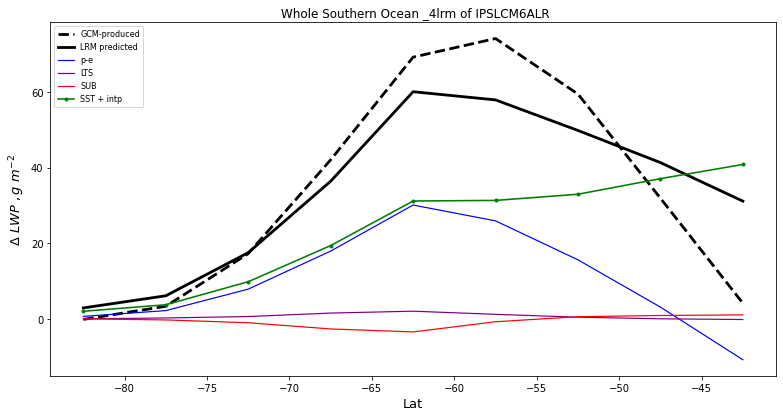

In [23]:
# whole (component)contribution plot in Lat:
parameters = {'axes.labelsize': 13, 'legend.fontsize': 8, 
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}

plt.rcParams.update(parameters)

Regimes = 4
CCFs = 4
lat = np.arange(-85., -40., 5.) +2.5

# individual components:
predict_label_LWP_abr =  predict_dict1['label'] *1
predict_value_LWP_abr =  deepcopy(predict_dict1['value'] )

predict_label_LWP_PI =  predict_dict2['label'] *1
predict_value_LWP_PI =  deepcopy(predict_dict2['value'])

# total LWP changes:
total_report_LWP_abr = output_4lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'] * 1    #  change the models
total_predict_LWP_abr = output_4lrm_mon_bin_predi_abr[deck_nas2[a]] * 1

total_report_LWP_PI = output_4lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'] * 1
total_predict_LWP_PI = output_4lrm_mon_bin_predi_PI[deck_nas2[a]] * 1


# define array to store the total and individual components of 4 lrm:

dabrmeanpi_ylat_ccfsdri_whole = full((5, 9), 0.0)
dabrmeanpi_ylat_report_whole = full((9), 0.0)
dabrmeanpi_ylat_regressed_whole = full((9), 0.0)

    
dabrmeanpi_ylat_report_whole[:] = 1000.* (nanmean(total_report_LWP_abr[abr_str_mon:abr_end_mon, :,:], axis = (0,2)) - nanmean(total_report_LWP_PI[:, :,:], axis = (0,2)))
dabrmeanpi_ylat_regressed_whole[:] = 1000.* (nanmean(total_predict_LWP_abr[abr_str_mon:abr_end_mon, :,:], axis = (0,2)) - nanmean(total_predict_LWP_PI[:, :,:], axis = (0,2)))

for i in arange(0, (CCFs + 1), 1):

    dabrmeanpi_ylat_ccfsdri_whole[i,:] = nanmean(predict_value_LWP_abr[i][abr_str_mon:abr_end_mon, :,:], axis= (0,2)) - nanmean(predict_value_LWP_PI[i][:, :,:], axis= (0,2))
    
    # print(predict_value_LWP_PI[i][:,:,:])  # [abr_str_mon:abr_end_mon,:,:]
    

# Plotting:

fig91, ax91 =  plt.subplots(1, 1, figsize=(6.50 *2, 6.5 *1))

# ------------------__ The whole Sothern Ocean
ax91.plot(lat, dabrmeanpi_ylat_report_whole[:],  '--', c ='k', linewidth= 2.8, label='GCM-produced')
ax91.plot(lat, dabrmeanpi_ylat_regressed_whole[:], '-', c= 'k', linewidth= 2.8, label='LRM predicted')

# ax91.plot(lat, dabrmeanpi_ylat_ccfsdri_whole[0,:], '-', c= 'green', linewidth=1.2, label='SST')
ax91.plot(lat, dabrmeanpi_ylat_ccfsdri_whole[1,:], '-', c= 'blue',  linewidth=1.2, label='p-e')
ax91.plot(lat, dabrmeanpi_ylat_ccfsdri_whole[2,:], '-', c= 'purple', linewidth=1.2, label='LTS')
ax91.plot(lat, dabrmeanpi_ylat_ccfsdri_whole[3,:], '-', c= 'red',  linewidth=1.2, label='SUB')
# ax91.plot(lat, dabrmeanpi_ylat_ccfsdri_whole[4,:], '-', c= 'gray',  linewidth=2.4, label='intp')
ax91.plot(lat, dabrmeanpi_ylat_ccfsdri_whole[0,:] + dabrmeanpi_ylat_ccfsdri_whole[4,:], '.-', c = 'green', linewidth = 1.6, label="SST + intp")


ax91.legend(loc='upper left')
ax91.set_xlabel('Lat')
ax91.set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax91.set_title(" Whole Southern Ocean " + "_4lrm" + " of "+ deck_nas2[a])


plt.show()

# plt.savefig("Latitudinal_wholesodeltaLWP_4lrm_New_CESM2", dpi =200)

In [48]:
frac_regimes = np.zeros((4, total_report_LWP_abr.shape[0]))
predict_label_LWP_abr =  predict_dict1['label'] *1
for i in range(4):
    
    # i is the regime_index
    n = np.array(np.nonzero( (predict_label_LWP_abr== (i+1))==True) ).shape
    print("number of points to be this regime: ", n)
    
    for t in range(total_report_LWP_abr.shape[0]):
        nt = np.array(np.nonzero( (predict_label_LWP_abr[t,:,:]== (i+1))==True) ).shape[1]
        frac_regimes[i,t] = nt / (np.array(np.nonzero( (predict_label_LWP_abr[t,:,:]!=0 )==True) ).shape[1])

print(np.array(np.nonzero( (predict_label_LWP_abr[t,:,:]==0 )==True) ).shape[1])



number of points to be this regime:  (3, 246346)
number of points to be this regime:  (3, 375903)
number of points to be this regime:  (3, 234651)
number of points to be this regime:  (3, 228395)
48


number of points to be this regime:  (3, 219361)
number of points to be this regime:  (3, 539358)
number of points to be this regime:  (3, 221159)
number of points to be this regime:  (3, 186522)
(4, 1800)


Text(0.5, 1.0, '$Time\\ Series\\ Decomposition $ of NESM3')

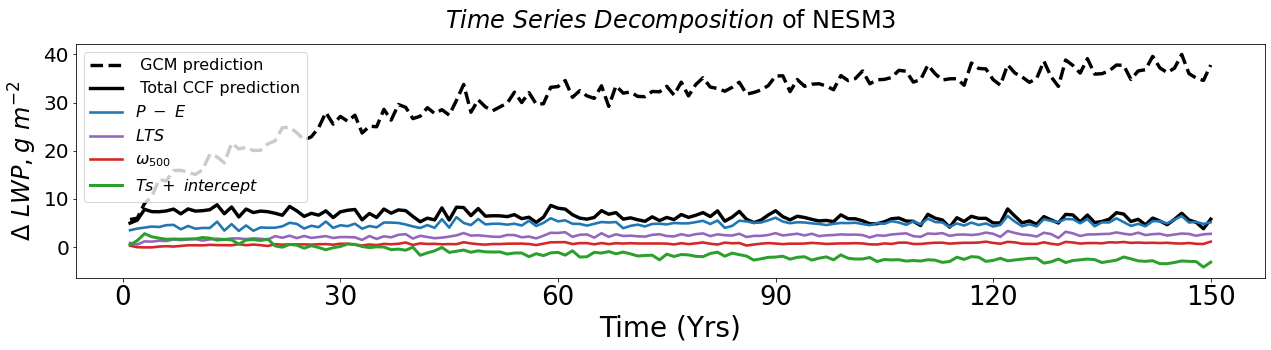

In [33]:
# whole (component) contribution plot in Times:
parameters = {'axes.labelsize': 24, 'legend.fontsize': 16, 
          'axes.titlesize': 24, 'xtick.labelsize': 26, 'ytick.labelsize': 20}

plt.rcParams.update(parameters)
# lat_array and lon_array for the SO:
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

Regimes = 4
CCFs = 4
time = np.arange(1, 151, 1)

# individual components:
predict_label_LWP_abr = predict_dict1['label'] *1
predict_value_LWP_abr = deepcopy(predict_dict1['value'] )

predict_label_LWP_PI = predict_dict2['label'] *1
predict_value_LWP_PI = deepcopy(predict_dict2['value'])

# total LWP changes:
total_report_LWP_abr = output_4lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'] * 1    #  change the models
total_predict_LWP_abr = output_4lrm_mon_bin_predi_abr[deck_nas2[a]] * 1

total_report_LWP_PI = output_4lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'] * 1
total_predict_LWP_PI = output_4lrm_mon_bin_predi_PI[deck_nas2[a]] * 1


# define array to store the total and individual components of 4 lrm:

dabrmeanpi_ttime_ccfsdri_whole = full((5, total_report_LWP_abr.shape[0]), 0.0)
dabrmeanpi_ttime_report_whole = full((total_report_LWP_abr.shape[0]), 0.0)
dabrmeanpi_ttime_predicted_whole = full((total_report_LWP_abr.shape[0]), 0.0)

shape_yr = total_report_LWP_abr.shape[0]//12   #.. times dimension shapes in annually
##. 'layover_yr' is the data array for storing the 2-d data array for annually-eman:
layover_yr1 = np.zeros((5, shape_yr))
layover_yr2 = np.zeros((shape_yr))
layover_yr3 = np.zeros((shape_yr))
layover_yr_Fr = np.zeros((4, shape_yr))


dabrmeanpi_ttime_report_whole[:] = 1000.* (area_mean(total_report_LWP_abr[:,:,:], y_range, x_range) - nanmean(area_mean(total_report_LWP_PI[:,:,:], y_range, x_range), axis = (0)))
dabrmeanpi_ttime_predicted_whole[:] = 1000.* (area_mean(total_predict_LWP_abr[:,:,:], y_range, x_range) - nanmean(area_mean(total_predict_LWP_PI[:,:,:], y_range, x_range), axis = (0)))


for i in arange(0, (CCFs + 1), 1):

    dabrmeanpi_ttime_ccfsdri_whole[i,:] = area_mean(predict_value_LWP_abr[i][:,:,:], y_range, x_range) - nanmean(area_mean(predict_value_LWP_PI[i][:,:,:], y_range, x_range), axis = (0))

    # print(predict_value_LWP_PI[i][:,:,:])  # [abr_str_mon:abr_end_mon,:,:]

# Calc fraction of regimes:

frac_regimes = np.zeros((4, total_report_LWP_abr.shape[0]))
#predict_label_LWP_abr =  predict_dict1['label'] *1
for i in range(4):
    
    # i is the regime_index
    n = np.array(np.nonzero( (predict_label_LWP_abr== (i+1))==True) ).shape
    print("number of points to be this regime: ", n)
    
    for t in range(total_report_LWP_abr.shape[0]):
        nt = np.array(np.nonzero( (predict_label_LWP_abr[t,:,:]== (i+1))==True) ).shape[1]
        frac_regimes[i,t] = nt / (np.array(np.nonzero( (predict_label_LWP_abr[t,:,:]!=0 )==True) ).shape[1])

print(frac_regimes.shape)


for t in range(shape_yr):
    
    layover_yr2[t]  =  nanmean(dabrmeanpi_ttime_report_whole[t*12:(t+1)*12], axis=0)
    layover_yr3[t]  =  nanmean(dabrmeanpi_ttime_predicted_whole[t*12:(t+1)*12], axis=0)
    
    layover_yr1[ :, t] =  nanmean(dabrmeanpi_ttime_ccfsdri_whole[:, t*12:(t+1)*12], axis= 1)
    layover_yr_Fr[:, t] = nanmean(frac_regimes[:, t*12:(t+1)*12], axis =1)
    
    
# Plotting:
fig91 =  plt.figure(figsize=(6.50* 4, 6.5* 1))
ax91 = fig91.add_axes([0, 0, 0.635, 0.5])


# ------------------__ The whole Sothern Ocean
ax91.plot(time, layover_yr2[:150],  '--', c ='k', linewidth= 3.4,  label=r' GCM prediction')
ax91.plot(time, layover_yr3[:150], '-', c= 'k', linewidth= 3.4,  label=r' Total CCF prediction')

# ax91.plot(time,layover_yr1[0,:150], '-', c= 'green', linewidth=3.0, label='$ Ts$'order = 99)
ax91.plot(time,layover_yr1[1,:150], '-', c= 'tab:blue',  linewidth = 2.6, label=r'$ P\ -\ E$', zorder = 99)
ax91.plot(time,layover_yr1[2,:150], '-', c= 'tab:purple', linewidth = 2.6, label=r'$LTS$', zorder = 99)
ax91.plot(time,layover_yr1[3,:150], '-', c= 'tab:red',  linewidth = 2.6, label=r'$\omega_{500}$', zorder = 99)
# ax91.plot(latlayover_yr1[4,:150], '-', c= 'gray',  linewidth=1.8, label='intp', zorder = 99)
ax91.plot(time,layover_yr1[0,:150] +layover_yr1[4,:150], '-', c = 'tab:green', linewidth = 3.0, label="$ Ts\ +\ intercept$", zorder = 99)

# ax91.set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
# fracs
# ax92 = ax91.twinx()
# ax92.set_ylabel('frac of regimes', color = 'tab:red')
# ax92.set_ylim([0., 1.])
# ax92.plot(time, layover_yr_Fr[0, :150], marker = '^', linestyle = '-', c= 'blue', linewidth=1.0, label=r'$ Cold & Up $', zorder = 0)
# ax92.plot(time, layover_yr_Fr[1, :150], marker = '^', linestyle = '-', c= 'red', linewidth=1.0, label=r'$Hot\ &\ Up $', zorder = 0)
# ax92.plot(time, layover_yr_Fr[2, :150], marker = 'v', linestyle = '-', c= 'blue', linewidth=1.0, label=r'$ Cold & Down $', zorder = 0)
# ax92.plot(time, layover_yr_Fr[3, :150], marker = 'v', linestyle = '-', c= 'red', linewidth=1.0, label=r'$Hot\ &\ Down $', zorder = 0)
plt.xticks(ticks= np.arange(0., 180, 30.), labels = np.arange(0, 180, 30))
plt.xlabel(r'Time (Yrs)', fontsize = 28)
# plt.yticks(ticks = np.arange(-15., 45., 15), labels = np.arange(-15, 45, 15))
plt.ylabel(r'$ \Delta\ LWP, g\ m^{-2}$') # _{(abr4x\ -\ piC)}
ax91.legend(loc='upper left')
# ax92.legend(loc='center right', fontsize = 14)
# ax91.set_title(" Whole Southern Ocean " + "_4lrm" + " of IPSLCM6ALR")
plt.title(r"$Time\ Series\ Decomposition $" + " of "+ deck_nas2[a], pad = 15.80)

# plt.savefig(path6+"plotTime_" + deck_nas2[a] + '_July13.jpg', bbox_inches = "tight", dpi = 400)

[[0.         0.         0.         ... 0.10526316 0.2481203  0.39097744]
 [0.         0.         0.         ... 0.13380282 0.26760563 0.3943662 ]
 [0.         0.         0.         ... 0.25694444 0.29166667 0.36111111]
 ...
 [0.         0.         0.         ... 0.17763158 0.32894737 0.35526316]
 [0.         0.         0.01829268 ... 0.20121951 0.29268293 0.29268293]
 [0.         0.         0.01075269 ... 0.16666667 0.25806452 0.30107527]]
[[0.         0.         0.         ... 0.23387097 0.15725806 0.08064516]
 [0.         0.         0.01960784 ... 0.20784314 0.13333333 0.0627451 ]
 [0.         0.         0.         ... 0.15837104 0.13574661 0.09049774]
 ...
 [0.         0.         0.         ... 0.22727273 0.11111111 0.09090909]
 [0.         0.         0.00862069 ... 0.16810345 0.10344828 0.10344828]
 [0.         0.         0.01351351 ... 0.18468468 0.10810811 0.07207207]]
(150, 9)


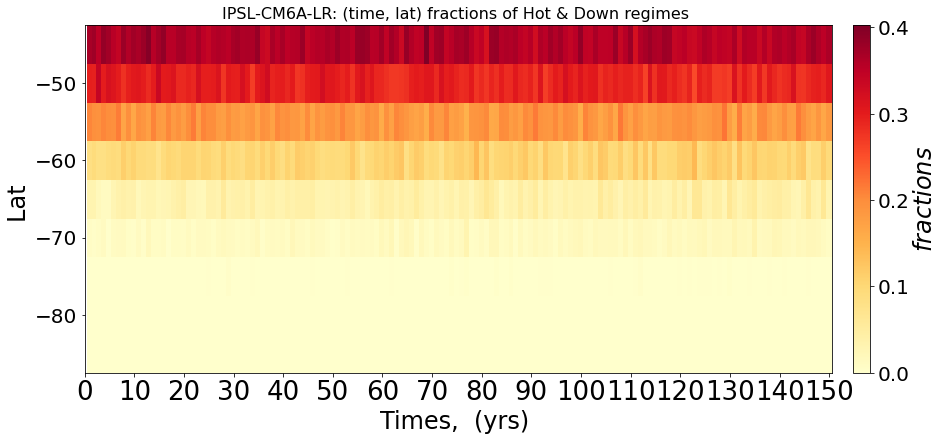

In [51]:
# plotting set
parameters = {'axes.labelsize': 22, 'legend.fontsize': 8, 
          'axes.titlesize': 19, 'xtick.labelsize':13, 'ytick.labelsize':13}


cmap  = plt.get_cmap('YlOrRd') 

predict_label_LWP_abr =  predict_dict1['label'] *1
t_lat_mesh = np.zeros((4, total_report_LWP_abr.shape[0], total_report_LWP_abr.shape[1]))

for m in np.arange(4):
    for i in np.arange(total_report_LWP_abr.shape[0]):
        
        nn0_t = np.asarray(nonzero(predict_label_LWP_abr[i, :, :] == (m+1))).shape[1]
        # print(nn0_t)
        for j in np.arange(total_report_LWP_abr.shape[1]):
            nn0_t_lat = np.asarray(nonzero(predict_label_LWP_abr[i, j, :] != 0)).shape[1]
            # print(nn0_t_lat)
            
            n_lat_t = np.asarray(nonzero(predict_label_LWP_abr[i, j, :] == (m+1))).shape[1]
            # print(n_lat_t)
            t_lat_mesh[m,i,j] = (n_lat_t  / nn0_t)

print(t_lat_mesh[3, :, :])

t_lat_mesh = np.asarray(t_lat_mesh)

print(t_lat_mesh[1,:])

layover_yr_4 = np.zeros((4, shape_yr, total_report_LWP_abr.shape[1]))
# 'layover_yr_4' is the anuualy mean fracs of each regimes:
for t in range(shape_yr):
    layover_yr_4[:, t,:] =  nanmean(t_lat_mesh[:, t*12:(t+1)*12, :], axis= 1)
    
print(layover_yr_4[0,:].shape)


# levels_value2  = linspace(nanpercentile(layover_yr_4, 1), nanpercentile(layover_yr_4, 99.75), 164)
# norm2 = BoundaryNorm(levels_value2, ncolors= cmap_2.N, extend='both')

# 'x_gcm' is the Times (yrs), 'y_gcm' is the latitude

x_gcm  =   np.arange(1, 151, 1)
y_gcm  =  np.arange(-85., -40., 5.)

X_gcm, Y_gcm = meshgrid(x_gcm, y_gcm)

fig101, ax101  =  plt.subplots(1, 1, figsize = (16.2, 6.4))
im1  = ax101.pcolormesh(X_gcm, Y_gcm, layover_yr_4[3,:150,:].T, shading = 'nearest', cmap = cmap)  #..anmean_LWP_bin_Tskew_wvp..LWP_bin_Tskin_sub
ax101.set_xlabel("Times, "+  " (yrs) ")
ax101.set_ylabel("Lat " )
ax101.set_xticks(np.arange(0, 151, 10))
ax101.set_title("IPSL-CM6A-LR: (time, lat) fractions of Hot & Down regimes ", loc='center', fontsize = 16)
fig101.colorbar(im1, ax = ax101, label = r"$fractions$", pad = 0.0235)

# plt.savefig("may3rd_plotFracs_IPSLCM6ALR_2", dpi = 405)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice


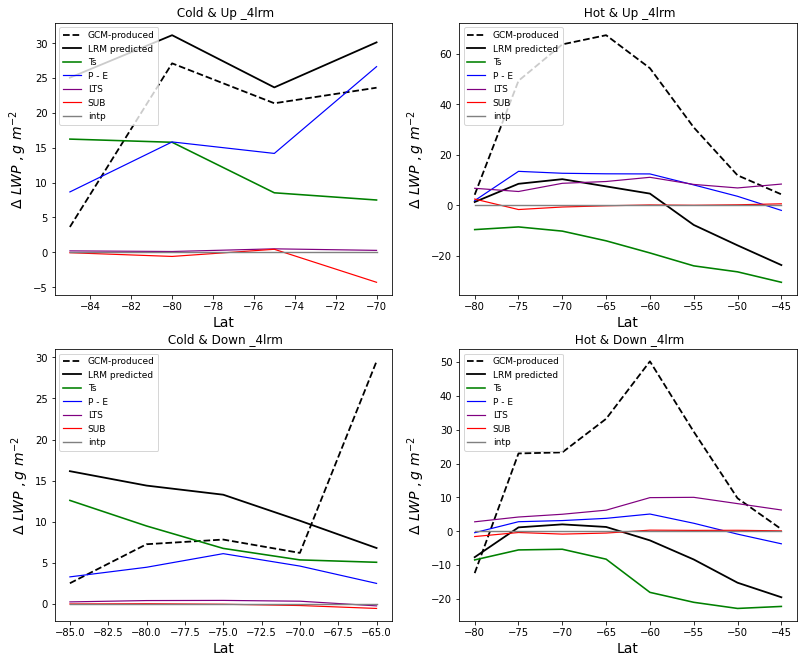

In [54]:
# regime-divided plots for components' contribution

parameters = {'axes.labelsize': 14, 'legend.fontsize': 9,
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}

plt.rcParams.update(parameters)

Regimes = 4
CCFs = 4
lat = np.arange(-85., -40., 5.)
# individual components:
predict_label_LWP1 =  predict_dict1['label'] *1
predict_value_LWP1 =  deepcopy(predict_dict1['value'] )

predict_label_LWP2 =  predict_dict2['label'] *1
predict_value_LWP2 =  deepcopy(predict_dict2['value'])
# print(predict_dict2['value'])

# total LWP changes:
total_report_LWP1  = output_4lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'] * 1    #  change the models
total_predict_LWP1  = output_4lrm_mon_bin_predi_abr[deck_nas2[a]] * 1

total_report_LWP2  = output_4lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'] * 1
total_predict_LWP2  = output_4lrm_mon_bin_predi_PI[deck_nas2[a]] * 1


# define array to store the total and individual components of 4 lrm:
dabrmeanpi_ylat_ccfsdri_4lrm = full((4, 5, 9), 0.00)
dabrmeanpi_ylat_report_4lrm = full((4, 9), 0.00)
dabrmeanpi_ylat_regressed_4lrm = full((4, 9), 0.00)

for i in arange(0, Regimes, 1):
    
    ind_notregime_PI = predict_label_LWP2 != (i+1)
    
    ind_notregime_abr = predict_label_LWP1 != (i+1)
    # print(ind_notregime_abr)
    
    total_report_LWP_PI = total_report_LWP2 *1
    total_report_LWP_abr = total_report_LWP1 *1
    total_predict_LWP_PI = total_predict_LWP2 *1
    total_predict_LWP_abr = total_predict_LWP1 *1
    
    total_report_LWP_PI[ind_notregime_PI] =  np.nan
    total_report_LWP_abr[ind_notregime_abr] = np.nan
    total_predict_LWP_PI[ind_notregime_PI] =  np.nan
    total_predict_LWP_abr[ind_notregime_abr] = np.nan
    
    predict_value_LWP_PI = deepcopy(predict_value_LWP2)
    predict_value_LWP_abr = deepcopy(predict_value_LWP1)
    
    dabrmeanpi_ylat_report_4lrm[i, :] = 1000.* (nanmean(total_report_LWP_abr[abr_str_mon:abr_end_mon,:,:], axis = (0,2)) - nanmean(total_report_LWP_PI[:,:,:], axis = (0,2)))
    dabrmeanpi_ylat_regressed_4lrm[i, :] = 1000.* (nanmean(total_predict_LWP_abr[abr_str_mon:abr_end_mon,:,:], axis = (0,2)) - nanmean(total_predict_LWP_PI[:,:,:], axis = (0,2)))
    
    
    for j in arange(0, (CCFs + 1), 1):

        predict_value_LWP_PI[j][ind_notregime_PI] =  np.nan
        predict_value_LWP_abr[j][ind_notregime_abr] =  np.nan
    
        dabrmeanpi_ylat_ccfsdri_4lrm[i,j,:] = nanmean(predict_value_LWP_abr[j][abr_str_mon:abr_end_mon,:,:], axis= (0,2)) - nanmean(predict_value_LWP_PI[j][:,:,:], axis= (0,2))
        # print(predict_value_LWP_PI[j][:,:,:])  # [abr_str_mon:abr_end_mon,:,:]



# Plotting:

fig92, ax92 =  plt.subplots(2, 2, figsize=(6.65 *2, 5.5*2))

# ------------------ Cold & Up
ax92[0,0].plot(lat, dabrmeanpi_ylat_report_4lrm[0,:],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[0,0].plot(lat, dabrmeanpi_ylat_regressed_4lrm[0,:], '-', c= 'k', linewidth= 1.8, label='LRM predicted')

ax92[0,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[0,0,:], '-', c= 'green', linewidth= 1.6, label='Ts')
ax92[0,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[0,1,:], '-', c= 'blue',  linewidth=1.2, label='P - E')
ax92[0,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[0,2,:], '-', c= 'purple', linewidth=1.2, label='LTS')
ax92[0,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[0,3,:], '-', c= 'red',  linewidth=1.2, label='SUB')
ax92[0,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[0,4,:], '-', c= 'gray',  linewidth=1.4, label='intp')
# ax92[0,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[0,0,:] + dabrmeanpi_ylat_ccfsdri_4lrm[0,4,:], '.-', c = 'green', linewidth = 1.2, label="SST + intp")
ax92[0,0].legend(loc='upper left')
ax92[0,0].set_xlabel('Lat')
ax92[0,0].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[0,0].set_title(" Cold & Up " + "_4lrm")

# -----------------  Hot & Up
ax92[0,1].plot(lat, dabrmeanpi_ylat_report_4lrm[1,:],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[0,1].plot(lat, dabrmeanpi_ylat_regressed_4lrm[1,:], '-', c= 'k', linewidth= 1.8, label='LRM predicted')

ax92[0,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[1,0,:], '-', c= 'green', linewidth= 1.6, label='Ts')
ax92[0,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[1,1,:], '-', c= 'blue',  linewidth=1.2, label='P - E')
ax92[0,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[1,2,:], '-', c= 'purple', linewidth=1.2, label='LTS')
ax92[0,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[1,3,:], '-', c= 'red',  linewidth=1.2, label='SUB')
ax92[0,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[1,4,:], '-', c= 'gray',  linewidth=1.4, label='intp')
# ax92[0,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[1,0,:] + dabrmeanpi_ylat_ccfsdri_4lrm[1,4,:], '.-', c = 'green', linewidth = 1.2, label="SST + intp")
ax92[0,1].legend(loc='upper left')
ax92[0,1].set_xlabel('Lat')
ax92[0,1].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[0,1].set_title(" Hot & Up " + "_4lrm")

# ----------------- Cold & dOWN
ax92[1,0].plot(lat, dabrmeanpi_ylat_report_4lrm[2,:],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[1,0].plot(lat, dabrmeanpi_ylat_regressed_4lrm[2,:], '-', c = 'k', linewidth= 1.8, label='LRM predicted')

ax92[1,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[2,0,:], '-', c= 'green', linewidth= 1.6, label='Ts')
ax92[1,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[2,1,:], '-', c= 'blue',  linewidth=1.2, label='P - E')
ax92[1,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[2,2,:], '-', c= 'purple', linewidth=1.2, label='LTS')
ax92[1,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[2,3,:], '-', c= 'red',  linewidth=1.2, label='SUB')
ax92[1,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[2,4,:], '-', c= 'gray',  linewidth=1.4, label='intp')
# ax92[1,0].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[2,0,:] + dabrmeanpi_ylat_ccfsdri_4lrm[2,4,:], '.-', c = 'green', linewidth = 1.2, label="SST + intp")
ax92[1,0].legend(loc='upper left')
ax92[1,0].set_xlabel('Lat')
ax92[1,0].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[1,0].set_title(" Cold & Down " + "_4lrm")

# ----------------- Hot & Down 
ax92[1,1].plot(lat, dabrmeanpi_ylat_report_4lrm[3,:],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[1,1].plot(lat, dabrmeanpi_ylat_regressed_4lrm[3,:], '-', c= 'k', linewidth= 1.8, label='LRM predicted')

ax92[1,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[3,0,:], '-', c= 'green', linewidth= 1.6, label='Ts')
ax92[1,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[3,1,:], '-', c= 'blue',  linewidth=1.2, label='P - E')
ax92[1,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[3,2,:], '-', c= 'purple', linewidth=1.2, label='LTS')
ax92[1,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[3,3,:], '-', c= 'red',  linewidth=1.2, label='SUB')
ax92[1,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[3,4,:], '-', c= 'gray',  linewidth=1.4, label='intp')
# ax92[1,1].plot(lat, dabrmeanpi_ylat_ccfsdri_4lrm[3,0,:] + dabrmeanpi_ylat_ccfsdri_4lrm[3,4,:], '.-', c = 'green', linewidth = 1.2, label="SST + intp")
ax92[1,1].legend(loc='upper left')
ax92[1,1].set_xlabel('Lat')
ax92[1,1].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[1,1].set_title(" Hot & Down " + "_4lrm")


plt.show()

# plt.savefig("Latitudinal_regimesdeltaLWP_4lrm_New_IPSLCM6ALR")


(4, 1800)
(4, 1800)
(4, 1800)
(4, 1800)


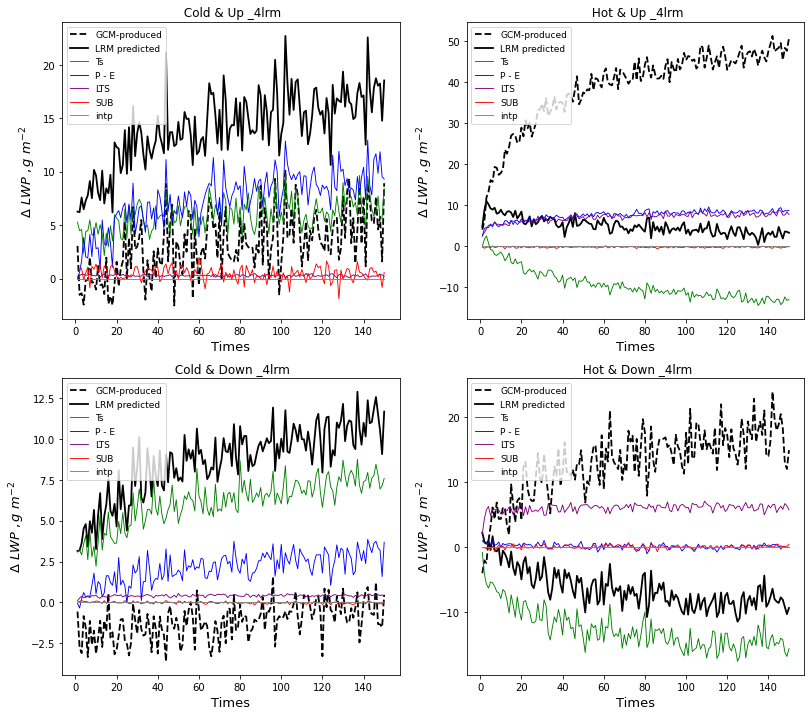

In [55]:
# regime-divided plots for components' contribution

parameters = {'axes.labelsize': 13, 'legend.fontsize': 9, 
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}

plt.rcParams.update(parameters)

Regimes = 4
CCFs = 4
time  = np.arange(1, 151)

# individual components:
predict_label_LWP1 =  predict_dict1['label'] *1
predict_value_LWP1 =  deepcopy(predict_dict1['value'] )

predict_label_LWP2 =  predict_dict2['label'] *1
predict_value_LWP2 =  deepcopy(predict_dict2['value'])
# print(predict_dict2['value'])

# total LWP changes:
total_report_LWP1  = output_4lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'] * 1    #  change the models
total_predict_LWP1  = output_4lrm_mon_bin_predi_abr[deck_nas2[a]] * 1

total_report_LWP2  = output_4lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'] * 1
total_predict_LWP2  = output_4lrm_mon_bin_predi_PI[deck_nas2[a]] * 1


# define array to store the total and individual components of 4 lrm:
dabrmeanpi_ttimes_ccfsdri_4lrm = full((4, 5, total_report_LWP1.shape[0]), 0.00)
dabrmeanpi_ttimes_report_4lrm = full((4, total_report_LWP1.shape[0]), 0.00)
dabrmeanpi_ttimes_predicted_4lrm = full((4, total_report_LWP1.shape[0]), 0.00)
shape_yr = total_report_LWP1.shape[0]//12   #.. times dimension shapes in annually
##. 'layover_yr' is the data array for storing the 2-d data array for annually-eman:
layover_yr1 = np.zeros((4, 5, shape_yr))
layover_yr2 = np.zeros((4, shape_yr))
layover_yr3 = np.zeros((4, shape_yr))


for i in arange(0, Regimes, 1):
    
    ind_notregime_PI = predict_label_LWP2 != (i+1)
    
    ind_notregime_abr = predict_label_LWP1 != (i+1)
    # print(ind_notregime_abr)
    
    total_report_LWP_PI = total_report_LWP2 *1
    total_report_LWP_abr = total_report_LWP1 *1
    total_predict_LWP_PI = total_predict_LWP2 *1
    total_predict_LWP_abr = total_predict_LWP1 *1
    
    total_report_LWP_PI[ind_notregime_PI] =  np.nan
    total_report_LWP_abr[ind_notregime_abr] = np.nan
    total_predict_LWP_PI[ind_notregime_PI] =  np.nan
    total_predict_LWP_abr[ind_notregime_abr] = np.nan
    
    predict_value_LWP_PI =  deepcopy(predict_value_LWP2)
    predict_value_LWP_abr =  deepcopy(predict_value_LWP1)
    
    dabrmeanpi_ttimes_report_4lrm[i,:] = 1000.* (nanmean(total_report_LWP_abr[:,:,:], axis = (1,2)) - nanmean(total_report_LWP_PI[:,:,:], axis = (0,1,2)))
    dabrmeanpi_ttimes_predicted_4lrm[i,:]  = 1000.* (nanmean(total_predict_LWP_abr[:,:,:], axis = (1,2)) - nanmean(total_predict_LWP_PI[:,:,:], axis = (0,1,2)))
    
    print(dabrmeanpi_ttimes_predicted_4lrm.shape)
    for j in arange(0, (CCFs + 1), 1):

        predict_value_LWP_PI[j][ind_notregime_PI] =  np.nan
        predict_value_LWP_abr[j][ind_notregime_abr] =  np.nan
    
        dabrmeanpi_ttimes_ccfsdri_4lrm[i,j, :] = (nanmean(predict_value_LWP_abr[j][:,:,:], axis = (1,2)) - nanmean(predict_value_LWP_PI[j][:,:,:], axis = (0,1,2)))
    
for t in range(shape_yr):

    layover_yr2[:,t]  =  nanmean(dabrmeanpi_ttimes_report_4lrm[:, t*12:(t+1)*12], axis = 1)
    layover_yr3[:,t]  =  nanmean(dabrmeanpi_ttimes_predicted_4lrm[:, t*12:(t+1)*12], axis = 1)
    
    layover_yr1[:,:, t] =  nanmean(dabrmeanpi_ttimes_ccfsdri_4lrm[:,:, t*12:(t+1)*12], axis= 2)



# Plotting:

fig92, ax92 =  plt.subplots(2, 2, figsize=(6.65 *2, 6.0*2))

# ------------------ Cold & Up
ax92[0,0].plot(time, layover_yr2[0,:150],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[0,0].plot(time, layover_yr3[0,:150], '-', c= 'k', linewidth= 1.8, label='LRM predicted')

ax92[0,0].plot(time, layover_yr1[0,0,:150], '-', c= 'green', linewidth= 0.9, label='Ts')
ax92[0,0].plot(time, layover_yr1[0,1,:150], '-', c= 'blue',  linewidth=0.9, label='P - E')
ax92[0,0].plot(time, layover_yr1[0,2,:150], '-', c= 'purple', linewidth=0.9, label='LTS')
ax92[0,0].plot(time, layover_yr1[0,3,:150], '-', c= 'red',  linewidth=0.9, label='SUB')
ax92[0,0].plot(time, layover_yr1[0,4,:150], '-', c= 'gray',  linewidth=0.9, label='intp')
# ax92[0,0].plot(time, layover_yr1[0,0,:150] + layover_yr1[0,4,:150], '.-', c = 'green', linewidth = 0.9, label="SST + intp")
ax92[0,0].legend(loc='upper left')
ax92[0,0].set_xlabel('Times')
ax92[0,0].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[0,0].set_title(" Cold & Up " + "_4lrm")

# -----------------  Hot & Up
ax92[0,1].plot(time, layover_yr2[1,:150],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[0,1].plot(time, layover_yr3[1,:150], '-', c= 'k', linewidth= 1.8, label='LRM predicted')

ax92[0,1].plot(time, layover_yr1[1,0,:150], '-', c= 'green', linewidth= 0.9, label='Ts')
ax92[0,1].plot(time, layover_yr1[1,1,:150], '-', c= 'blue',  linewidth=0.9, label='P - E')
ax92[0,1].plot(time, layover_yr1[1,2,:150], '-', c= 'purple', linewidth=0.9, label='LTS')
ax92[0,1].plot(time, layover_yr1[1,3,:150], '-', c= 'red',  linewidth=0.9, label='SUB')
ax92[0,1].plot(time, layover_yr1[1,4,:150], '-', c= 'gray',  linewidth=0.9, label='intp')
# ax92[0,1].plot(time, layover_yr1[1,0,:150] + layover_yr1[1,4,:150], '.-', c = 'green', linewidth = 0.9, label="SST + intp")
ax92[0,1].legend(loc='upper left')
ax92[0,1].set_xlabel('Times')
ax92[0,1].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[0,1].set_title(" Hot & Up " + "_4lrm")

# ----------------- Cold & Down
ax92[1,0].plot(time, layover_yr2[2,:150],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[1,0].plot(time, layover_yr3[2,:150], '-', c = 'k', linewidth= 1.8, label='LRM predicted')

ax92[1,0].plot(time, layover_yr1[2,0,:150], '-', c= 'green', linewidth= 0.9, label='Ts')
ax92[1,0].plot(time, layover_yr1[2,1,:150], '-', c= 'blue',  linewidth=0.9, label='P - E')
ax92[1,0].plot(time, layover_yr1[2,2,:150], '-', c= 'purple', linewidth=0.9, label='LTS')
ax92[1,0].plot(time, layover_yr1[2,3,:150], '-', c= 'red',  linewidth=0.9, label='SUB')
ax92[1,0].plot(time, layover_yr1[2,4,:150], '-', c= 'gray',  linewidth=0.9, label='intp')
# ax92[1,0].plot(time, layover_yr1[2,0,:150] + layover_yr1[2,4,:150], '.-', c = 'green', linewidth = 0.9, label="SST + intp")
ax92[1,0].legend(loc='upper left')
ax92[1,0].set_xlabel('Times')
ax92[1,0].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[1,0].set_title(" Cold & Down " + "_4lrm")

# ----------------- Hot & Down 
ax92[1,1].plot(time, layover_yr2[3,:150],  '--', c ='k', linewidth= 1.8, label='GCM-produced')
ax92[1,1].plot(time, layover_yr3[3,:150], '-', c= 'k', linewidth= 1.8, label='LRM predicted')

ax92[1,1].plot(time,layover_yr1[3,0,:150], '-', c= 'green', linewidth= 0.9, label='Ts')
ax92[1,1].plot(time,layover_yr1[3,1,:150], '-', c= 'blue',  linewidth= 0.9, label='P - E')
ax92[1,1].plot(time,layover_yr1[3,2,:150], '-', c= 'purple', linewidth= 0.9, label='LTS')
ax92[1,1].plot(time,layover_yr1[3,3,:150], '-', c= 'red',  linewidth= 0.9, label='SUB')
ax92[1,1].plot(time, layover_yr1[3,4,:150], '-', c= 'gray',  linewidth= 0.9, label='intp')
# ax92[1,1].plot(time, layover_yr1[3,0,:150],+ layover_yr1[3,4,:150], '.-', c = 'green', linewidth = 0.9, label="SST + intp")
ax92[1,1].legend(loc='upper left')
ax92[1,1].set_xlabel('Times')
ax92[1,1].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
ax92[1,1].set_title(" Hot & Down " + "_4lrm")


plt.show()

# plt.savefig("Latitude_structure(deltaLWP)_4lrm_New method_4regimes")

abr4x dimension:  (1800, 9, 72)
piCtrl dimension:  (1188, 9, 72)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


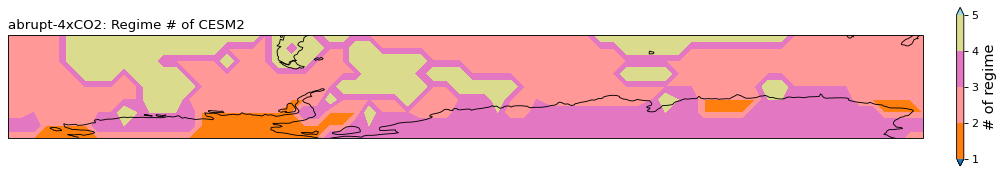

In [56]:
# map for the Corresponding regimes:
predict_label_LWP_abr = predict_dict1['label'] *1
predict_label_LWP_PI = predict_dict2['label'] *1
print("abr4x dimension: ", predict_label_LWP_abr.shape)
print("piCtrl dimension: ", predict_label_LWP_PI.shape)

# 'Table of Regimes'
# 'Regime 1': Cold & Up;
# 'Regime 2': Hot  & Up;
# 'Regime 3': Cold & Down;
# 'Regime 4': Hot  &  Down.

## choose the time of label:
t_PI = 1187
t_abr = 1759

# lat and lon grids corresponding to the data structure 
lats = np.arange(-85., -40., 5.) +  2.5
lons = np.arange(-180., 180, 5.)

# begin plotting
X, Y  = np.meshgrid(lons, lats)

proj = ccrs.PlateCarree()
fig101 = plt.figure( figsize=(18, 7.5*2.5), dpi = 80)
# ax101 = fig101.add_subplot(2, 1 )
ax101 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax101.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(1, 6, 1.)

contourf1 = ax101.contourf(X, Y, predict_label_LWP_abr[t_abr,:,:]+1, levels= clevel, cmap='tab20', extend='both')  # predict_label_LWP_PI[t_PI,:,:]
cb1  = fig101.colorbar(contourf1, ax=ax101, orientation='vertical', label='# of regime', extend='both', shrink=0.14, pad=0.03)

# contourf2 = ax101[1].contourf(X, Y, predict_label_LWP_ABR[t_abr,:,:], levels= clevel, cmap='tab20', extend='both')
# cb2  = fig.colorbar(contourf2, ax=ax101[1], orientation='vertical', label='# of regime', extend='both', shrink=0.14, pad=0.03)

# ax101.set_title('piControl: Regime # of CESM2', fontsize=12, loc='left')
ax101.set_title('abrupt-4xCO2: Regime # of CESM2', fontsize=12, loc='left')

plt.show()
# plt.savefig('Regimes_cesm2.png')

In [57]:
# Plotting the frequency of occurrence: each regimes Maps

# regime-divided plots for components' contribution

parameters = {'axes.labelsize': 12, 'legend.fontsize': 9,
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}

plt.rcParams.update(parameters)

Regimes = 4
CCFs = 4
time  = np.arange(1, 151)

# individual components:
predict_label_LWP1 = predict_dict1['label'] *1
predict_value_LWP1 = deepcopy(predict_dict1['value'] )  # abrupt-4xCO2

predict_label_LWP2 = predict_dict2['label'] *1
predict_value_LWP2 = deepcopy(predict_dict2['value'])  # picontrol
# print(predict_dict2['value'])

# total LWP changes:
total_report_LWP1 = output_4lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'] * 1    #abr4x
total_predict_LWP1 = output_4lrm_mon_bin_predi_abr[deck_nas2[a]] * 1

total_report_LWP2 = output_4lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'] * 1   #PI
total_predict_LWP2 = output_4lrm_mon_bin_predi_PI[deck_nas2[a]] * 1


# define array to store the total and individual components of 4 lrm:
# dabrmeanpi_ttimes_ccfsdri_4lrm = full((4, 5, total_report_LWP1.shape[0]), 0.00)
fraction_of_occurrence = full((4, total_report_LWP1.shape[1], total_report_LWP1.shape[2]), 0.00)

ind_Regime1_10 = predict_label_LWP1[:, 1, 0] == 0+1
print(asarray(nonzero(ind_Regime1_10==True)).shape[1]/ (total_report_LWP1.shape[0]))

for R in arange(0, Regimes, 1):
    for i in range(total_report_LWP1.shape[1]):
        for j in range(total_report_LWP1.shape[2]):
            
            ind_true_grids = predict_label_LWP1[:,i,j] == (R+1)
            fraction_of_occurrence[R, i, j] = asarray(nonzero(ind_true_grids==True)).shape[1] / (total_report_LWP1.shape[0])
    
# print(fraction_of_occurrence)

0.4305555555555556


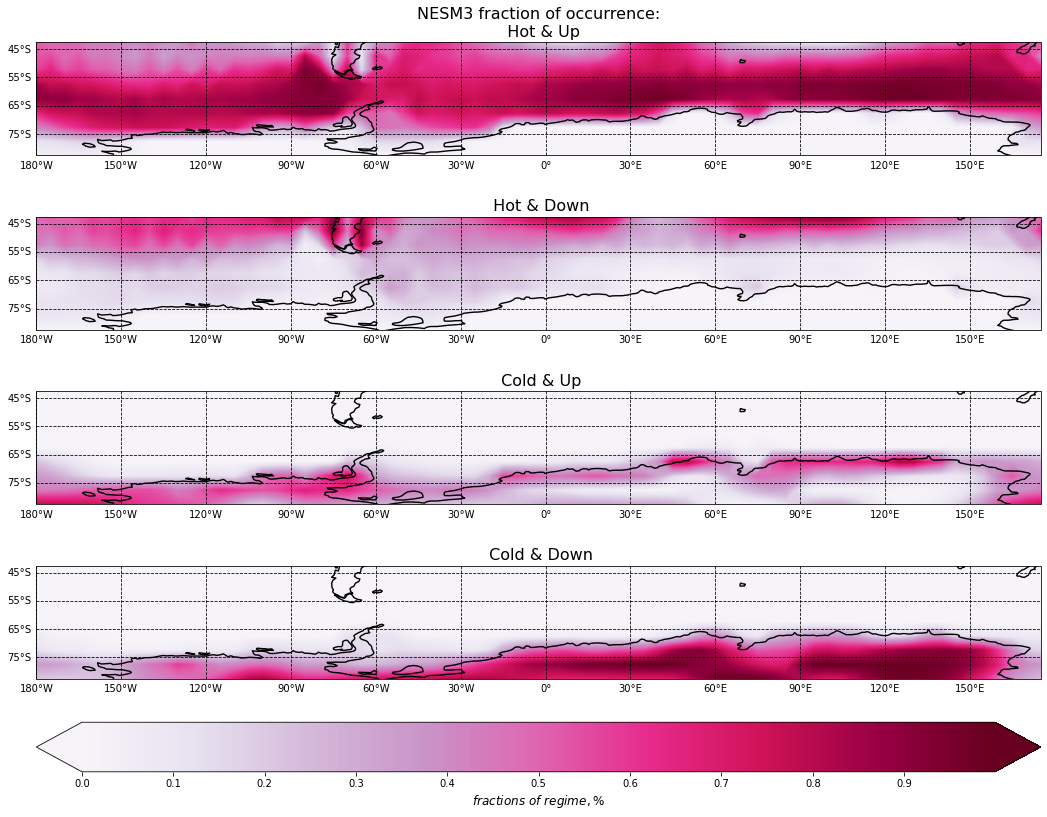

In [58]:
### plotting Map:
from matplotlib.gridspec import GridSpec

t_start = arange(0*12, 12*12, 12)
t_end = arange(0*12, 150*12, 12)

regime_Nas = ['Cold & Up', 'Hot & Up', 'Cold & Down', 'Hot & Down']
R = 0

# lat and lon grids corresponding to the data structure 
lats = np.arange(-85., -40, 5.) +  2.5
lons = np.arange(-180., 180., 5.)

# begin plotting
X, Y  = np.meshgrid(lons, lats)

proj  = ccrs.PlateCarree()
fig101 = plt.figure( figsize=(18, 5.5 *2.5))
gs = GridSpec(5, 1, height_ratios=[3, 3, 3, 3, 1])

# R1:
R = 1
ax101 = plt.subplot(gs[0], projection= proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax101.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth = 1.4)
clevel = np.arange(0., 1.0, 0.0005)

contourf1 = ax101.contourf(X, Y, fraction_of_occurrence[R,:,:], cmap = cm.PuRd, levels = clevel, extend='both')  # predict_label_LWP_PI[t_PI,:,:]
# cb1 = fig101.colorbar(contourf1, ax = ax101, orientation='horizontal', label=r"$ fractions\ of\ regime, \% $", shrink=0.50, pad = 0.03)
ax101.set_title(deck_nas2[a]+" fraction of occurrence:\n  " +regime_Nas[R], fontsize = 16)

extent = [-180, 180, -85, -40]
gl = ax101.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(arange(extent[0], extent[1], 30.))
gl.ylocator = mticker.FixedLocator(arange(extent[2], extent[3], 10.))

# R2:
R = 3
ax102 = plt.subplot(gs[1], projection= proj, sharex = ax101)

#..map attributes country border, coastline, Rivers, Lakes..
ax102.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth = 1.4)
clevel = np.arange(0., 1.0, 0.0005)

contourf2 = ax102.contourf(X, Y, fraction_of_occurrence[R,:,:], cmap = cm.PuRd, levels = clevel, extend='both')  # predict_label_LWP_PI[t_PI,:,:]
# cb2 = fig101.colorbar(contourf2, ax = ax102, orientation='horizontal', label=r"$ fractions\ of\ regime, \% $", shrink=0.50, pad = 0.03)
ax102.set_title(" " +regime_Nas[R], fontsize = 16)

extent = [-180, 180, -85, -40]
gl = ax102.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(arange(extent[0], extent[1], 30.))
gl.ylocator = mticker.FixedLocator(arange(extent[2], extent[3], 10.))

# R3:
R = 0
ax103 = plt.subplot(gs[2], projection= proj, sharex = ax101)

#..map attributes country border, coastline, Rivers, Lakes..
ax103.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth = 1.4)
clevel = np.arange(0., 1.0, 0.0005)

contourf3 = ax103.contourf(X, Y, fraction_of_occurrence[R,:,:], cmap = cm.PuRd, levels = clevel, extend='both')  # predict_label_LWP_PI[t_PI,:,:]
# cb3 = fig101.colorbar(contourf3, ax = ax103, orientation='horizontal', label=r"$ fractions\ of\ regime, \% $", shrink=0.50, pad = 0.03)
ax103.set_title(" " +regime_Nas[R], fontsize = 16)

extent = [-180, 180, -85, -40]
gl = ax103.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(arange(extent[0], extent[1], 30.))
gl.ylocator = mticker.FixedLocator(arange(extent[2], extent[3], 10.))

# R4:
R = 2
ax104 = plt.subplot(gs[3], projection= proj, sharex = ax101)

ax105 = plt.subplot(gs[4])
                    
#..map attributes country border, coastline, Rivers, Lakes..
ax104.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth = 1.4)
clevel = np.arange(0., 1.0, 0.0005)

contourf4 = ax104.contourf(X, Y, fraction_of_occurrence[R,:,:], cmap = cm.PuRd, levels = clevel, extend='both')  # predict_label_LWP_PI[t_PI,:,:]
cb4 = fig101.colorbar(contourf4, cax = ax105, orientation='horizontal', label=r"$ fractions\ of\ regime, \% $", shrink = 0.010, pad = 0.0009)
ax104.set_title(" " +regime_Nas[R], fontsize = 16)

extent = [-180, 180, -85, -40]
gl = ax104.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(arange(extent[0], extent[1], 30.))
gl.ylocator = mticker.FixedLocator(arange(extent[2], extent[3], 10.))


# Savefig
# plt.savefig(path6+ "fre_t_Regime_"+ deck_nas2[a], dpi = 400)

In [24]:
##PLot 5:

# determine model:
a  = 7
modn = deck_nas2[a]

# TR_sst, TR_sub
folder_4lrm =  glob.glob(path1+deck2[a]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
print(folder_4lrm)
index_st_sst = folder_4lrm[0].index('fit') +4
index_ed_sst = folder_4lrm[0].index('K')
# print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])

index_st_sub  = folder_4lrm[0].index('_ud') +3
index_ed_sub  = folder_4lrm[0].index('_dats')
TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
print('TR_sst= ', TR_sst)
print('TR_sub= ', TR_sub)


# Read best_fit 6 data
WD = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'   # Plots_proposal

folder =  glob.glob(WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')
print(folder)

output_ARRAY  =  load(folder[0], allow_pickle=True)  # str(TR_sst)
x_gcm      =   array(output_ARRAY['bound_x'])
y_gcm      =   array(output_ARRAY['bound_y'])
output_stat1   = output_ARRAY['stats_1']
output_stat2   = output_ARRAY['stats5']

TR_sst_bestfit5  = output_ARRAY['TR_minabias_SST']
TR_sub_bestfit5  = output_ARRAY['TR_minabias_SUB']
TR_sst_bestfit6  = output_ARRAY['TR_maxR2_SST']
TR_sub_bestfit6  = output_ARRAY['TR_maxR2_SUB']
print(TR_sst_bestfit5, TR_sub_bestfit6)
#..defined a proper LWP ticks within its range

p10_valuespace1 = nanpercentile(output_stat1, 25.) - nanpercentile(output_stat1, 15.)
levels_value1 = linspace(nanpercentile(output_stat1, 0.05)-p10_valuespace1, round(( nanpercentile(output_stat1, 99.75)+p10_valuespace1), 2), 164)   # arange(0.368, 0.534, 0.002) 
levels_value1 = 1000.*levels_value1   #  transfer to g m^-2
# print(levels_value1)
p10_valuespace2 = nanpercentile(output_stat2, 25.) - nanpercentile(output_stat2, 15.)
levels_value2  = linspace(nanpercentile(output_stat2, 0.5)-p10_valuespace2, nanpercentile(output_stat2, 99.75)+p10_valuespace2, 164)
# print(levels_value2)

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-H_best(test6)fit_272.76K_ud0.8_dats.npz']
TR_sst=  272.76
TR_sub=  0.008
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/GISSE21H__STAT_pi+abr_22x_31y.npz']
275.16805615743 0.007889380691099929


In [59]:
## PLot 5:

# 

# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 15,
      'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


#..print(linspace(nanpercentile(output_stat, 1.5), nanpercentile(output_stat, 99.5), 164))
#..pick the desired colormap
cmap  = plt.get_cmap('YlOrRd') 
cmap_2 = plt.get_cmap('viridis_r')   # 'YlOrRd'
norm1 = BoundaryNorm(levels_value1, ncolors= cmap.N, extend='both')
norm2 = BoundaryNorm(levels_value2, ncolors= cmap_2.N, extend='both')

fig1 =  plt.figure(figsize = (19.8, 10.6))
ax1  =  fig1.add_subplot(2, 2, (1, 2))
# subplot3 :
output_yrs = {}
output_yrs[deck_nas2[a]] = arange(0, shape_yr_modelPI[deck_nas2[a]]+150)
# print(output_yrs[deck_nas2[b]].shape)

ax1.scatter(output_yrs[deck_nas2[a]][:99], 1000.*output_4lrm_report[deck_nas2[a]][:99], label = 
            "$LWP|piControl $", c='b')
ax1.scatter(output_yrs[deck_nas2[a]][99:249], 1000.*output_4lrm_report[deck_nas2[a]][99:249], label = 
            "$LWP|abrupt-4xCO2 $", c= 'r')
ax1.plot(output_yrs[deck_nas2[a]], 1000.*output_4lrm_predict[deck_nas2[a]][:249], "g", 
         label="$aLWP/aXi_{piControl}*{Xi_{abrupt4xCO2}}| $"+ "(TR_sst = "+ str(TR_sst)+"K, "+ 
         "TR_sub = "+ str(TR_sub)+ r"$Pa\ s^{-1}$" +")")
 
ax1.set_xlabel("Years")

ax1.set_ylabel("LWP, " + r"$g\ m_{-2}$")
ax1.set_title("(a) Actual & 4-lrm regressed LWP of IPSL-CM6A-LR", loc = 'left')
ax1.legend(loc = "upper left", prop={'size': 13})
#ax1.ylim((0.105, 0.121))


# subplot1
ax3  = plt.subplot(223)  #(16.2, 9.3))

im2  = ax3.pcolormesh(x_gcm, y_gcm, array(output_stat2), cmap=cmap_2, norm= norm2)
ax3.set_xlabel(r"$TR\_SUB_{@500mb},\ $"+ r"$Pa\ s^{-1}$")
ax3.set_ylabel(r"$TR\_SST,\ $" + r"$K $")
ax3.set_title("(b) " +r"$\ R^{2}$" + " of Using PI trained_4lrm predict PI LWP", loc='left', fontsize = 14)
# ax3.set_title("exp 'abrupt-4xCO2' GCM: BCCESM1 predict R_2", loc='left', fontsize = 11)
#.. add bestfit points
ax3.scatter(TR_sub_bestfit6, TR_sst_bestfit6, marker = '+', s= 65, c ='y')
fig1.colorbar(im2, ax = ax3, label= "Explained Variances", pad = 0.0235)


# subplot2
ax4  = plt.subplot(224)  #(16.2, 9.3))

im1  = ax4.pcolormesh(x_gcm, y_gcm, array(1000.*output_stat1), cmap=cmap, norm= norm1)   #..anmean_LWP_bin_Tskew_wvp..LWP_bin_Tskin_sub
ax4.set_xlabel(r"$TR\_SUB_{@500mb},\ $"+ r"$Pa\ s^{-1}$")
ax4.set_ylabel(r"$TR\_SST,\ $" + r"$K $")
ax4.set_title("(c) " +r"$ABS_{bias}$" + " of Using PI trained_4lrm predict abr4xCO2 LWP", loc='left', fontsize = 14)
ax4.scatter(TR_sub_bestfit5, TR_sst_bestfit5, marker = '*', s = 70, c='b')
fig1.colorbar(im1, ax = ax4, label= "Bias,"+ r"$\ (g*m^{-2})$", pad = 0.0235, values = arange(15.00, 30.10, 0.011))



# plt.suptitle( modn+ " Bias Metrics for USING piControl data Predict abr4xCO2 LWP", fontsize =18)

# plt.legend(loc='upper right',  fontsize= 12)


# set the spacing between subplots and plot 
plt.subplots_adjust(left = 0.095, bottom=0.125, right = 0.97, top=0.98, wspace = 0.165, hspace = 0.265)
# plt.savefig(path6+"plot5_model_bias_metrics_ipslcm6aLR", dpi=500)

# plt.subplot_tool()
plt.show()


NameError: name 'levels_value1' is not defined

In [20]:
# Choice the model you wants:
a =8   # IPSL-CM6A-LR

TR_sst = 260.0   #K

ind_sstlt_PI =  nonzero(output_2lrm_flavra_PI[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_PI =  nonzero(output_2lrm_flavra_PI[deck_nas2[a]]['SST'] >= TR_sst)

ind_sstlt_abr =  nonzero(output_2lrm_flavra_abr[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_abr  =  nonzero(output_2lrm_flavra_abr[deck_nas2[a]]['SST'] >= TR_sst)

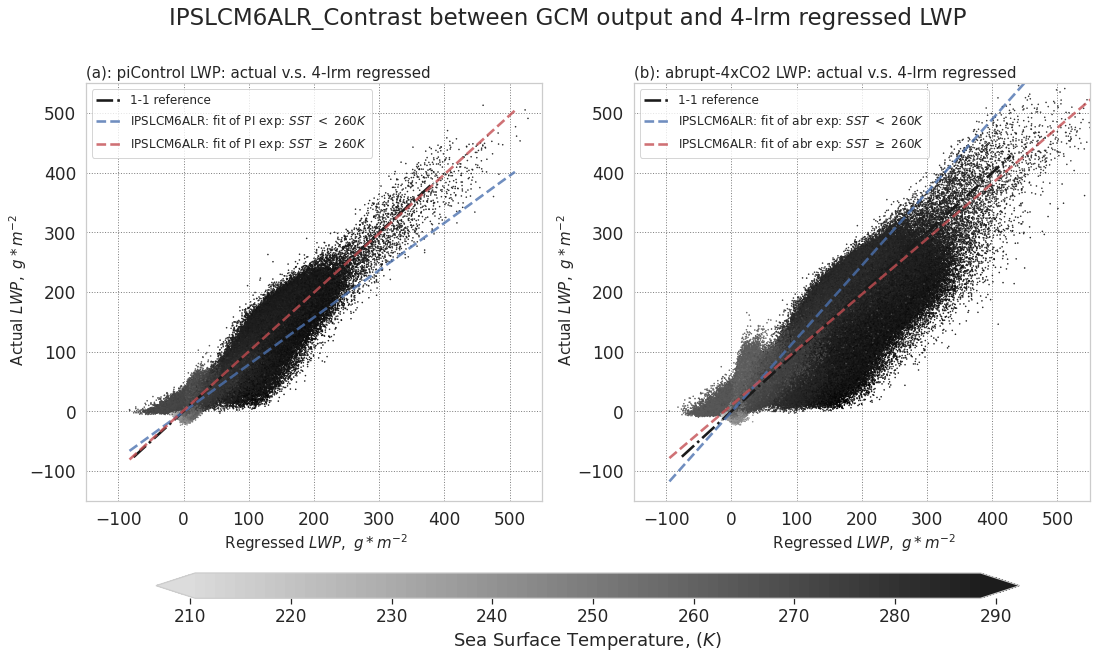

In [21]:
## PLot 4

# for a in range(len(deck2)):
a =8

TR_sst = 260.0   #K

ind_sstlt_PI =  nonzero(output_4lrm_flavra_PI[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_PI =  nonzero(output_4lrm_flavra_PI[deck_nas2[a]]['SST'] >= TR_sst)

ind_sstlt_abr =  nonzero(output_4lrm_flavra_abr[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_abr  =  nonzero(output_4lrm_flavra_abr[deck_nas2[a]]['SST'] >= TR_sst)



fig4, ax4 = plt.subplots(1, 2, figsize = (18., 10.6))   #(16.2, 9.3))

parameters = {'axes.labelsize': 18, 'legend.fontsize': 12,
          'axes.titlesize': 15, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

my_colors= array([
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors


# actual & regressed MONTHLY LWP data: 
PI_2lrm_actual  = array(output_4lrm_flavra_PI[deck_nas2[a]]['LWP'])
abr_2lrm_actual  = array(output_4lrm_flavra_abr[deck_nas2[a]]['LWP'])
PI_2lrm_predict  =  array(output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[a]]).flatten()
abr_2lrm_predict  =  array(output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[a]]).flatten()

# print(PI_2lrm_predict.shape, PI_2lrm_actual.shape)


cax_1 = ax4[1].scatter(1000.*abr_2lrm_predict,  1000.*abr_2lrm_actual,  c = array(output_2lrm_flavra_abr[deck_nas2[a]]['SST']), s= 0.3, cmap= 'gist_yarg')


cax_0 = ax4[0].scatter(1000.*PI_2lrm_predict,  1000.*PI_2lrm_actual,  c = array(output_2lrm_flavra_PI[deck_nas2[a]]['SST']), s = 0.3, cmap= 'gist_yarg')

fig4.colorbar(cax_1, ax = [ax4[0], ax4[1]], label ="Sea Surface Temperature," + r"$\ (K)$", orientation='horizontal', extend='both', pad = 0.125, shrink = 0.86, aspect=31, 
             values = arange(210., 290., 1.))   #.. viridis_r
# cb1.set_ticks(array([210., 220., 230., 240., 260., 275., 290.]))
# cb1.set_ticklabels([210, 220, 230, 240, 260, 270, 275, 290])


# Reference line added:
x1  = linspace(nanpercentile(1000.*abr_2lrm_actual, 0.01)- 60., nanpercentile(1000.*abr_2lrm_actual, 99)+180., 50)
y1  = x1
x2  = linspace(nanpercentile(1000.*PI_2lrm_actual, 0.01)- 60., nanpercentile(1000.*PI_2lrm_actual, 99)+180., 50)
y2  = x2


ax4[0].plot(x2, y2, color= 'k', linewidth =2.6, linestyle = '-.', label = "1-1 reference")
ax4[1].plot(x1, y1, color= 'k', linewidth =2.6, linestyle = '-.', label = "1-1 reference")


# add 2 polyfit line for group_1: SST<240K and points group_2: SST>= 240K

#  axes[1]:
par_cold_abr = polyfit(1000.*abr_2lrm_predict[ind_sstlt_abr], 1000.*abr_2lrm_actual[ind_sstlt_abr], 1)
par_warm_abr = polyfit(1000.*abr_2lrm_predict[ind_sstle_abr], 1000.*abr_2lrm_actual[ind_sstle_abr], 1)

x_abr =  linspace(1000.*min(abr_2lrm_predict) , 1000.*max(abr_2lrm_predict)-20.,  30)
yc_abr = par_cold_abr[0]*x_abr + par_cold_abr[1]
l1, = ax4[1].plot(x_abr, yc_abr, alpha = 0.8, linestyle = '--',  c = 'b', linewidth= 2.6, label=deck_nas2[a]+ ": fit of abr exp: "+ r"$SST\ <\ 260K$")

yw_abr = par_warm_abr[0]*x_abr + par_warm_abr[1]
l2, = ax4[1].plot(x_abr, yw_abr, alpha = 0.8, linestyle = '--',  c = 'r', linewidth= 2.6,  label=deck_nas2[a]+ ": fit of abr exp: "+ r"$SST\ \geq\ 260K$")
ax4[1].legend(loc = 'upper left')


# axes[0]:
par_cold_PI = polyfit(1000.*PI_2lrm_predict[ind_sstlt_PI], 1000.*PI_2lrm_actual[ind_sstlt_PI], 1)
par_warm_PI = polyfit(1000.*PI_2lrm_predict[ind_sstle_PI], 1000.*PI_2lrm_actual[ind_sstle_PI], 1)

x_PI =  linspace(1000.*min(PI_2lrm_predict), 1000.*max(PI_2lrm_predict)- 20., 30)
yc_PI = par_cold_PI[0] *x_PI + par_cold_PI[1]
l3, = ax4[0].plot(x_PI, yc_PI, alpha = 0.8, linestyle = '--',  c = 'b', linewidth= 2.6, label=deck_nas2[a]+ ": fit of PI exp: "+ r"$SST\ <\ 260K$" )

yw_PI = par_warm_PI[0]*x_PI + par_warm_PI[1]
l4, = ax4[0].plot(x_PI, yw_PI, alpha = 0.8, linestyle = '--',  c = 'r', linewidth= 2.6, label=deck_nas2[a]+ ": fit of PI exp: "+ r"$SST\ \geq\ 260K$" )
ax4[0].legend(loc = 'upper left')


ax4[0].set_xlabel(" Regressed "+r"$LWP,\ g*m^{-2}$")
ax4[0].set_ylabel(" Actual "+ r"$LWP,\ g*m^{-2}$", labelpad= 0.65)

ax4[1].set_xlabel(" Regressed "+r"$LWP,\ g*m^{-2}$")
ax4[1].set_ylabel(" Actual "+ r"$LWP,\ g*m^{-2}$", labelpad= 0.525)

ax4[0].set_title("(a): piControl LWP: actual v.s. 4-lrm regressed", loc = 'left')
ax4[1].set_title("(b): abrupt-4xCO2 LWP: actual v.s. 4-lrm regressed", loc = 'left')

plt.suptitle(deck_nas2[a] + "_Contrast between GCM output and 4-lrm regressed LWP ", fontsize = 23)
ax4[0].set_xlim([-150., 550.])
ax4[0].set_ylim([-150., 550.])
ax4[1].set_xlim([-150., 550.])
ax4[1].set_ylim([-150., 550.])
ax4[0].set_xticks([-100., 0., 100., 200., 300., 400., 500.])
ax4[1].set_xticks([-100, 0, 100, 200, 300, 400, 500])


#.. plot
#..plt.savefig("Actual&RegressedValues_"+ deck_nas[a]+ "_1LRM_" +str(round(TR_sst))+'K', dpi= 100)
# plt.savefig("plot4_ActualvsRegressed_LWP_ipslcm6aLR_bestfit5", dpi = 500)




In [22]:
##PLot 6: scatter plot for 18 GCMs regressed_bias of diff lrm (INCLUDING BESTFIT5/ BESTFIT6):


output_ARRAY = {}
output_intermedia = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_mon_bin_abr={}
output_mon_bin_PI ={}
output_mon_bin_LWPactual_abr = {}
output_mon_bin_LWPactual_PI = {}

output_mon_bin_LWPpredi_PI =  {}
output_mon_bin_LWPpredi_abr = {}
# output_LRM_st =  {}
# output_LRM_le = {}
shape_mon_modelPI =  {}
shape_mon_modelabr = {}

for i in range(len(deck2)):

    #.. 273K-(/0.0Pa) 2lrm
    folder_2lrm = glob.glob(path1+deck2[i]['modn']+'mond_273_dats.npz')
    print(folder_2lrm)
    
    output_ARRAY[deck_nas2[i]] =  load(folder_2lrm[0], allow_pickle=True)  #+'_'+str(Tr_sst)
    
    # output_ARRAY[deck_nas2[i]] =  load(path1+deck2[i]['modn']+'mond_'+str(273)+'K_'+'ud'+str(0.0)+'_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]]  = output_ARRAY[deck_nas2[i]]['rawdata_dict']

    output_dict0_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_abr_var']
    shape_mon_modelPI[deck_nas2[i]]   =  output_dict0_PI[deck_nas2[i]]['shape_yr']
    shape_mon_modelabr[deck_nas2[i]]   =  output_dict0_abr[deck_nas2[i]]['shape_yr']
    output_mon_bin_abr[deck_nas2[i]]   = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]]    = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]]   =  output_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]]   =  output_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']


    #.... 0K -1lrm
    print(glob.glob(path1 +deck2[i]['modn']+'mond_'+str(0.0)+ '_dats.npz'))
    
    output_ARRAY[deck_nas2[i]+'1lrm'] =  load(path1 +deck2[i]['modn']+'mond_'+str(0.0)+ '_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'1lrm']  = output_ARRAY[deck_nas2[i]+'1lrm']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'1lrm']  =   output_intermedia[deck_nas2[i]+'1lrm'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'1lrm']  =   output_intermedia[deck_nas2[i]+'1lrm'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'1lrm']   =  output_dict0_PI[deck_nas2[i]+'1lrm']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'1lrm']   =  output_dict0_abr[deck_nas2[i]+'1lrm']['shape_yr']
    output_mon_bin_abr[deck_nas2[i]+'1lrm']   =  output_dict0_abr[deck_nas2[i]+'1lrm']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'1lrm']    =  output_dict0_PI[deck_nas2[i]+'1lrm']['dict1_mon_bin_PI']


    output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']   =  output_mon_bin_abr[deck_nas2[i]+'1lrm']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'1lrm']   =  output_mon_bin_PI[deck_nas2[i]+'1lrm']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'1lrm'] =  output_intermedia[deck_nas2[i]+'1lrm'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] = output_intermedia[deck_nas2[i]+'1lrm'][()]['LWP_predi_bin_abr']

    
    #.... Best fit 5, least abr abs(bias):
    
    folder_bestfit5_lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit5_lrm[0])

    output_ARRAY[deck_nas2[i]+'Bestfit5'] =  load(folder_bestfit5_lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'Bestfit5']  = output_ARRAY[deck_nas2[i]+'Bestfit5']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'Bestfit5']   =  output_dict0_PI[deck_nas2[i]+'Bestfit5']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'Bestfit5']   =  output_dict0_abr[deck_nas2[i]+'Bestfit5']['shape_yr']

    output_mon_bin_abr[deck_nas2[i]+'Bestfit5']   =  output_dict0_abr[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'Bestfit5']    =  output_dict0_PI[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_abr[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_PI[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit5'] =  output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] = output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_abr']
    

    #.... Best fit 6, largest_pi_R_2:

    folder_bestfit6_lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit6_lrm[0])

    output_ARRAY[deck_nas2[i]+'Bestfit6'] =  load(folder_bestfit6_lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'Bestfit6']  = output_ARRAY[deck_nas2[i]+'Bestfit6']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'Bestfit6']  =   output_intermedia[deck_nas2[i]+'Bestfit6'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'Bestfit6']  =   output_intermedia[deck_nas2[i]+'Bestfit6'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'Bestfit6']   =  output_dict0_PI[deck_nas2[i]+'Bestfit6']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'Bestfit6']   =  output_dict0_abr[deck_nas2[i]+'Bestfit6']['shape_yr']

    output_mon_bin_abr[deck_nas2[i]+'Bestfit6']   =  output_dict0_abr[deck_nas2[i]+'Bestfit6']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'Bestfit6']    =  output_dict0_PI[deck_nas2[i]+'Bestfit6']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']   =  output_mon_bin_abr[deck_nas2[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit6']   =  output_mon_bin_PI[deck_nas2[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit6'] =  output_intermedia[deck_nas2[i]+'Bestfit6'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] = output_intermedia[deck_nas2[i]+'Bestfit6'][()]['LWP_predi_bin_abr']
    



['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1mond_273_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test5)fit_270.46K_ud-0.2_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5mond_273_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test5)fit_268.7K_ud-0.0_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2mond_273_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test5)fit_271.79K_ud1.0

In [23]:
output_bias = {}
output_mean_LWP =  {}
output_meandelta_LWP   = {}
output_dabrpi_actual = {}
output_dabrpi_predict = {}
output_rmse_delta_LWP = {}

for i in range(len(deck2)):
    
    #.... 273K, 2LRM
    output_bias[deck_nas2[i]] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]] - output_mon_bin_LWPactual_abr[deck_nas2[i]]))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]]  =  output_mon_bin_LWPactual_abr[deck_nas2[i]]  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]])
    output_dabrpi_predict[deck_nas2[i]] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_273K']   =   nanmean(output_dabrpi_predict[deck_nas2[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =   nanmean(output_dabrpi_predict[deck_nas2[i]][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_273K']    =   nanmean(output_dabrpi_actual[deck_nas2[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_273K']   =   nanmean(output_dabrpi_actual[deck_nas2[i]][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]][:12*150,:,:].reshape(-1,1)) )
    
    
    #.... 0K, 1LRM
    output_bias[deck_nas2[i]+'1lrm'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'1lrm']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'1lrm'])
    output_dabrpi_predict[deck_nas2[i]+'1lrm'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'1lrm'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_0K']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_0K']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_0K']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1)) )
    
    #.... defined by Least_abs(bias)-> Bestfit5, 4LRM DATA
    #..least_abs(abr-bias)
    output_bias[deck_nas2[i]+'Bestfit5'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'Bestfit5']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit5'])
    output_dabrpi_predict[deck_nas2[i]+'Bestfit5'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit5'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*150,:,:].reshape(-1,1)) )
    
    #.... defined by Least_abs(bias)-> Bestfit6, 4LRM DATA
    #..largest_pi R_2
    output_bias[deck_nas2[i]+'Bestfit6'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'Bestfit6']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit6'])
    output_dabrpi_predict[deck_nas2[i]+'Bestfit6'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit6'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*150,:,:].reshape(-1,1)) )
    
    # print(output_bias[deck_nas2[i]])
    # print(len(output_mon_bin_LWPactual_abr[deck_nas2[i]].flatten()))
    
    # print(output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_0K'], output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_0K'])
    

In [57]:
from scipy.optimize import curve_fit

def target_func(x, m, k):
    
    '''
    1-d line linear fit
    '''
    y = m*x + k
    return y



def calc_r2(Y_pre, Y):
    
    residual_ydata = array(Y).reshape(-1,1) -  array(Y_pre).reshape(-1,1)
    
    ss_res_bar       = (residual_ydata**2).sum()
    ss_tot_bar       = ((Y - Y.mean())**2).sum()
    R_square  = 1. - (ss_res_bar / ss_tot_bar )

    return R_square

0.7333981922528692 6.054926775972563
[[0.73339819]] [6.05492678] 0.9872332436322673
[[ 1.46679638  2.71788741  3.96897845  5.22006948  6.47116051  7.72225154
   8.97334257 10.22443361 11.47552464 12.72661567 13.9777067  15.22879773
  16.47988877 17.7309798  18.98207083 20.23316186 21.4842529  22.73534393]]


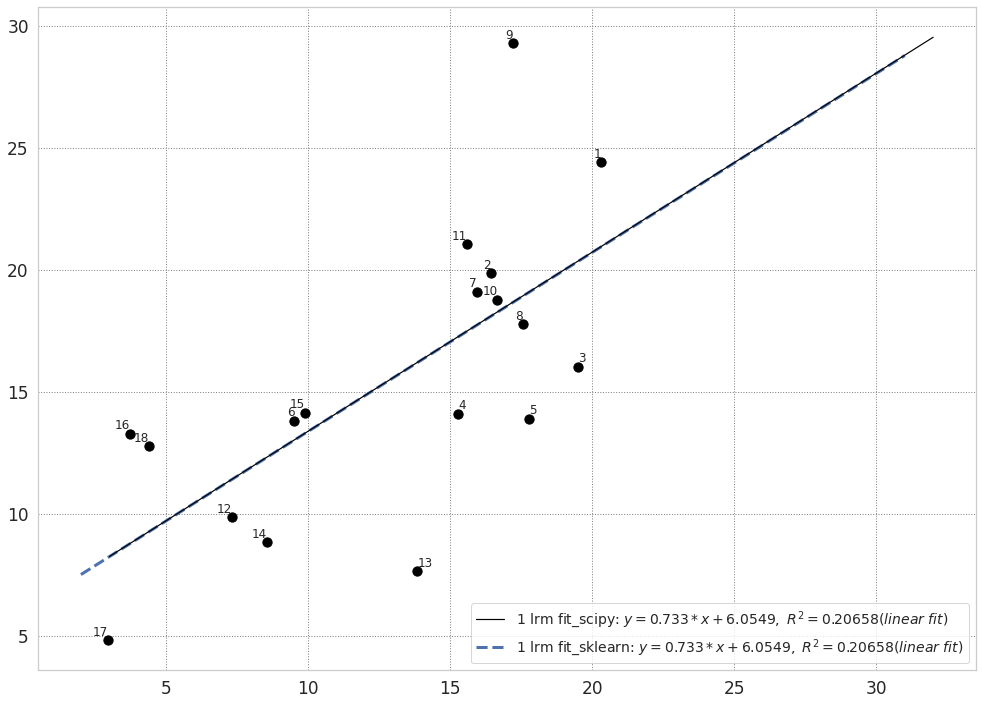

In [95]:
## Test PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 14, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6  = plt.figure(figsize =(16.8, 12.2))  # (16.2, 9.3))
ax6  = plt.axes()

# x = arange(0.003, 0.018, 0.001)   #..15 yr
# x = arange(0.006, 0.032, 0.001)   #..150yrs
x   = linspace(0.002, 0.031, 18) * 1000.   # for all
y   = linspace(0.003, 0.032, 18) * 1000.
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

output_mons = {}
regr_data_0K =   []
report_data_0K =   []

regr_data_273K = []
report_data_273K = []

regr_data_leastabrbias = []
report_data_leastabrbias = []

regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
# plt.gcf()

plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []


for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6.scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(0, 2.17 - random.rand(1)), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K, report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = plt.plot(y, POPT_0K[0] * y + POPT_0K[1], label="1 lrm fit_scipy: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)
print(POPT_0K[0], POPT_0K[1])

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(regr_data_0K.reshape(-1,1), report_data_0K.reshape(-1,1))
print(result1.coef_, result1.intercept_ , r2_score(y.reshape(-1,1),x.reshape(-1,1)))

fitp2 = plt.plot(x, (x * 0.733 + 6.05), linestyle = '--', linewidth=3, label="1 lrm fit_sklearn: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (regr_skk.coef_, regr_skk.intercept_, r2_score(report_data_0K.reshape(-1,1), regr_data_0K.reshape(-1,1))))
# Add Reference line:
# Refp  = plt.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth = 3.8, zorder = 5)  # Blue

# sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})
plt.legend()
print(linspace(0.002, 0.031, 18)*1000. * result1.coef_)

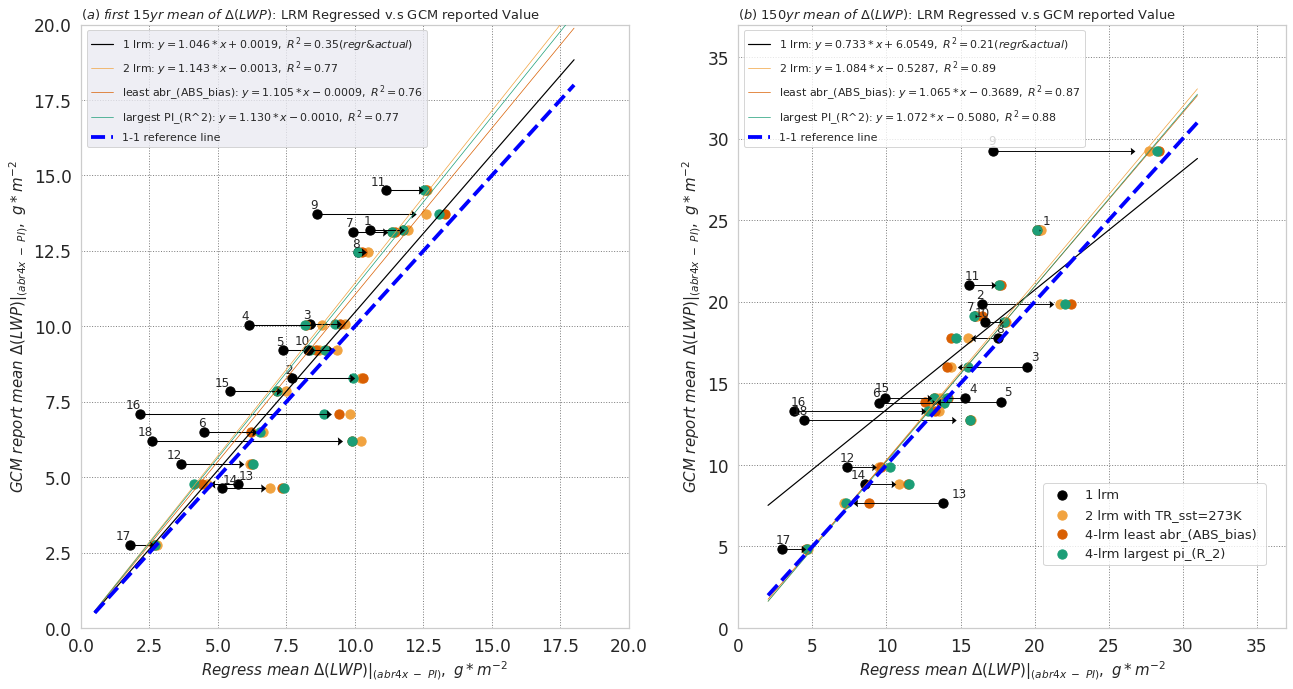

In [96]:
## PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 11, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6, ax6  = plt.subplots(1, 2, figsize =(21.6, 11.1))  # (16.2, 9.3))

x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y   = x

# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

# 15yr 
regr_data_0K_15yr =   []
report_data_0K_15yr =   []
regr_data_273K_15yr = []
report_data_273K_15yr = []
regr_data_leastabrbias_15yr = []
report_data_leastabrbias_15yr = []
regr_data_largestpiR2_15yr = []
report_data_largestpiR2_15yr = []


# 150 yr
regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr1   =  150
yr2   =  15
# plt.gcf()
output_mons   =  {}
plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []

plot_scat1_15yr = []
plot_scat2_15yr = []
plot_scat3_15yr = []
plot_scat4_15yr = []

# 150 yr
for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6[1].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0017, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[1].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(12.9*random.rand(1), 2.77), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = ax6[1].plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f(regr&actual)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# Calc the R square, plot the fit line:
calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
fitp2 = ax6[1].plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm: "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 0.7, zorder = 4)


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# Calc the R square, plot the fit line:
calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
fitp3 = ax6[1].plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="least abr_(ABS_bias): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 0.7, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# Calc the R square, plot the fit line:
calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
fitp3 = ax6[1].plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "largest PI_(R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 0.7, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[1].plot(x, y, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
ax6[1].set_xlim([0., 37.])
ax6[1].set_ylim([0., 37.])

ax6[1].set_xlabel(r"$ Regress\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")
ax6[1].set_ylabel(r"$ GCM\ report\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")

ax6[1].set_title( r"$(b)\ %d yr\ mean\ of\ \Delta(LWP)$"%(yr1) +": LRM Regressed v.s GCM reported Value" , loc ='left', fontsize =13)
legend61 = ax6[1].legend([scp1, scp2, scp3, scp4], ['1 lrm', '2 lrm with TR_sst=273K ', '4-lrm least abr_(ABS_bias) ', '4-lrm largest pi_(R_2)'], 
                    loc='lower right', bbox_to_anchor=(0.975, 0.093), fontsize= 13)
ax6[1].legend(loc='upper left')
ax6[1].add_artist(legend61)

sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})


# 15yr:

for a in range(len(deck2)):    
    

    scp1_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K_15yr = append(regr_data_0K_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K_15yr = append(report_data_0K_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1_15yr.append(scp1_15yr)
    
    scp2_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K_15yr = append(regr_data_273K_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'])
    report_data_273K_15yr = append(report_data_273K_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'])
    # scatter group2
    plot_scat2_15yr.append(scp2_15yr)
    
    scp3_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias_15yr = append(regr_data_leastabrbias_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'])
    report_data_leastabrbias_15yr = append(report_data_leastabrbias_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'])
    # scatter group3
    plot_scat3_15yr.append(scp3_15yr)
    
    scp4_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2_15yr = append(regr_data_largestpiR2_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'])
    report_data_largestpiR2_15yr = append(report_data_largestpiR2_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'])
    # scatter group4
    plot_scat4_15yr.append(scp4_15yr)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6[0].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0019, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[0].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(1.3*random.rand(1), 2.77-random.rand(1)), textcoords = "offset points", arrowprops=dict(facecolor='black', shrink=0.95), 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")

    
#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K_15yr, POCV_0K_15yr  = curve_fit(target_func, regr_data_0K_15yr , report_data_0K_15yr)
# Calc the R square, plot the fit line:
R_square_0K_15yr  = calc_r2(regr_data_0K_15yr, report_data_0K_15yr)
fitp1_15yr = ax6[0].plot(y_15yr, POPT_0K_15yr[0] * x_15yr + POPT_0K_15yr[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f(regr&actual)$" % (POPT_0K_15yr[0], POPT_0K_15yr[1], R_square_0K_15yr), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K_15yr, POCV_273K_15yr  = curve_fit(target_func, regr_data_273K_15yr, report_data_273K_15yr)
# Calc the R square, plot the fit line:
R_square_273K_15yr  = calc_r2(regr_data_273K_15yr, report_data_273K_15yr)
fitp2_15yr = ax6[0].plot(y_15yr, POPT_273K_15yr[0] * x_15yr + POPT_273K_15yr[1], label="2 lrm: "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K_15yr[0], POPT_273K_15yr[1], R_square_273K_15yr), color="#f1a340", linewidth = 0.7, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias_15yr, POCV_leastabrbias_15yr  = curve_fit(target_func, regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# Calc the R square, plot the fit line:
R_square_leastabrbias_15yr  = calc_r2(regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_leastabrbias_15yr[0] * x_15yr + POPT_leastabrbias_15yr[1], label="least abr_(ABS_bias): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias_15yr[0], POPT_leastabrbias_15yr[1], R_square_leastabrbias_15yr), color="#d95f02", linewidth = 0.7, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2_15yr, POCV_largestpiR2_15yr  = curve_fit(target_func, regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# Calc the R square, plot the fit line:
R_square_largestpiR2_15yr  = calc_r2(regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_largestpiR2_15yr[0] * x_15yr + POPT_largestpiR2_15yr[1], label= "largest PI_(R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2_15yr[0], POPT_largestpiR2_15yr[1], R_square_largestpiR2_15yr), color="#1b9e77", linewidth = 0.7, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[0].plot(x_15yr, y_15yr, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)

ax6[0].set_xlim([0., 20.])
ax6[0].set_ylim([0., 20.])


ax6[0].set_xlabel(r"$ Regress\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")
ax6[0].set_ylabel(r"$ GCM\ report\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")

ax6[0].set_title( r"$(a)\ first\ %d yr\ mean\ of\ \Delta(LWP)$"%(yr2) +": LRM Regressed v.s GCM reported Value" , loc ='left', fontsize =13)
legend62 = ax6[0].legend([scp1_15yr, scp2_15yr, scp3_15yr, scp4_15yr], ['1 lrm', '2 lrm with TR_sst=273K ', '4-lrm least abr_(ABS_bias) ', '4-lrm largest pi_(R_2)'], 
                    loc='lower right', bbox_to_anchor=(0.965, 0.093), fontsize= 13)
ax6[0].legend(loc='upper left')
# ax6[0].add_artist(legend62)

# plt.savefig('plot6_Scatters_0K&273K&Bestfit5&6_Compositeonmeand(LWP)', dpi = 500)


In [ ]:
print(1000.*regr_data_0K)
print(1000.*report_data_0K)

x = array([20.31969288, 16.42245359, 19.49929039, 15.27522641, 17.75969895,  9.51465783,
 15.94579419 , 17.55826368, 17.21027466, 16.65799056, 15.5973086,   7.3153503, 13.83997309,  8.53506344,  9.8733702,   3.73919073,  2.95396728,  4.40829008]) *(1./1000)

y = array([24.39877929, 19.85377042, 16.03064902, 14.07887328, 13.88738618, 13.82360605,
 19.10723209, 17.77672482, 29.278003,   18.77615813, 21.04546457,  9.86254724, 7.67339088,  8.84114473, 14.13177421,  13.29088098,  4.82944001, 12.76356024 ]) *(1./1000)

x = regr_data_0K
y = report_data_0K
popt, pocv = curve_fit(target_func, x ,y)
print(popt)

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(x.reshape(-1,1), y.reshape(-1,1))
print(regr_skk.coef_, regr_skk.intercept_ , r2_score(y.reshape(-1,1),x.reshape(-1,1)))

[20319.69288483 16422.45359475 19499.29038735 15275.22641057
 17759.69894507  9514.65782656 15945.79419191 17558.26368307
 17210.27466096 16657.99055837 15597.30860014  7315.35030326
 13839.97308984  8535.06344272  9873.3701958   3739.1907333
  2953.96727937  4408.29008058]
[24398.77929157 19853.77042408 16030.64901707 14078.8732788
 13887.38617743 13823.60605399 19107.23208543 17776.72482239
 29278.00300434 18776.15812618 21045.46457308  9862.54724272
  7673.3908781   8841.14472732 14131.77420522 13290.88098478
  4829.44001401 12763.56023633]
[0.73339819 6.05492678]
[[0.73339819]] [6.05492678] 0.20658021595794296


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:145: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x2ba110ff5d10>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


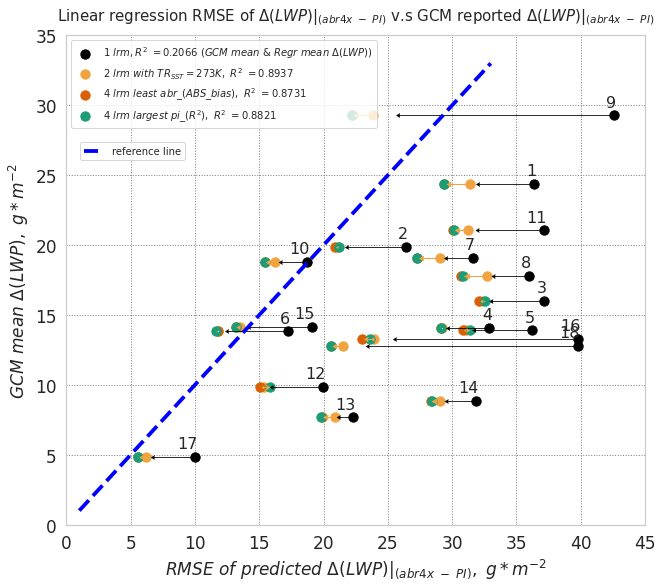

In [130]:
## PLot6(Alternate):
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 17, 'legend.fontsize': 10, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6  = plt.figure(figsize =(10.37, 9.0))  # (16.2, 9.3))
ax6  = plt.axes()

# x = arange(0.003, 0.018, 0.001)   #..15 yr
# x = arange(0.006, 0.032, 0.001)   #..150yrs
x   = linspace(0.001, 0.033, 18) * 1000.   # for all
y   = x
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

output_mons = {}

regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
# plt.gcf()

plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []


for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abrupt-4x' data

    scp1 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=87, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=87, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=87, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=87, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0014, scale = 1.10, color = "black", headwidth=6, zorder=2)

    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], 
               1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K']), 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']), 
              units='width', angles='xy', scale_units='xy', width=0.0016, scale = 1.09, color = "#f1a340", headwidth=6, zorder=4)

    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], 
             1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K']), 
             1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2']-  output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']), 
              units='width', angles='xy', scale_units='xy', width=0.0016, scale = 1.09, color=  "#f1a340", headwidth=6, zorder=3)

    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(2.69, 5.67), textcoords = "offset points", 
                 horizontalalignment= "right", verticalalignment = "bottom", fontsize = 16)


# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
# POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# # Calc the R square, plot the fit line:
# calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
# fitp1 = plt.plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.5f(regr&actual)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
# POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# # Calc the R square, plot the fit line:
# calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
# fitp2 = plt.plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm: "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 0.7, zorder = 4)


# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
# POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# # Calc the R square, plot the fit line:
# calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
# fitp3 = plt.plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="least abr_(ABS_bias): "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 0.7, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
# POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# # Calc the R square, plot the fit line:
# calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
# fitp3 = plt.plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "largest PI_(R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 0.7, zorder = 4)

##### end fitting_line plot

# Add Reference line:
Reline = ax6.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
plt.ylim([0., 35.])
plt.xlim([0., 45.])
plt.xlabel(r"$ RMSE\ of\ predicted\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")
plt.ylabel(r"$ GCM\ mean\ \Delta (LWP),\ $" + r"$g*m^{-2}$")

plt.title("Linear regression RMSE of " +r"$\Delta (LWP)|_{(abr4x\ -\ PI)}$" + " v.s GCM reported " + r"$\Delta (LWP)|_{(abr4x\ -\ PI)}$",  fontsize =15, pad = 15.67)

legend62 = ax6.legend(loc = 'upper left', bbox_to_anchor = (0.015, 0.792))
legend61 = ax6.legend([scp1, scp2, scp3, scp4, Reline], [r"$1\ lrm,R^{2}\ =%.4f $" %R_square_0K + r"$\ (GCM\ mean\ &\ Regr\ mean\ \Delta (LWP)) $", r"$2\ lrm\ with\ TR_{SST}=273K,\ R^{2}\ =%.4f $" %R_square_273K, 
               r"$ 4\ lrm\ least\ abr\_(ABS\_bias),\ R^{2}\ =%.4f $" %R_square_leastabrbias, r"$ 4\ lrm\ largest\ pi\_ (R^{2}),\ R^{2}\ =%.4f $" %R_square_largestpiR2, r"$Reference\ Line$"], loc='upper left')

plt.gca().add_artist(legend62)

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.savefig("plot6_Scatter_0K&273K&Bestfit5&6_CompositeRMSE&d(LWP)_whole150yrs", dpi = 500)
